In [ ]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


MNIST

11493376/11490434 [==============================] - 0s 0us/step
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1918 - accuracy: 0.9417
Epoch 2/10
1875/1875 [==========================

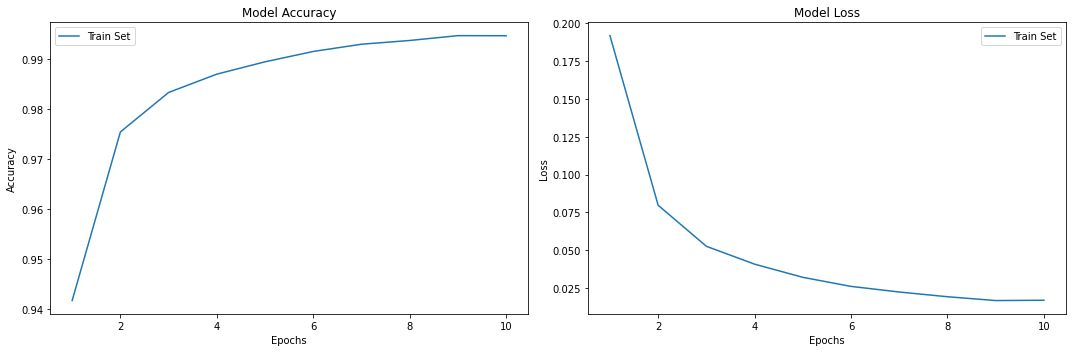

In [ ]:
#Importing all useful libraries 
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from keras import models
from keras.losses import categorical_crossentropy
from keras import metrics
import matplotlib.pyplot as plt
#Loadind dataset into train test 
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
#Reshaping the the images
X_train = X_train.reshape(X_train.shape[0],28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
#Changing the datatype of Image arrays to Float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#Normalizing the data arrays
X_train /= 255
X_test /= 255
#One hot Encoding or Categorizing Images to their respective classes
Y_train =tf.keras.utils.to_categorical(Y_train,10)
Y_test = tf.keras.utils.to_categorical(Y_test,10)
print(Y_train[0])
#Making a sequential based model 
model = tf.keras.models.Sequential(
    [
     tf.keras.layers.Flatten(input_shape = (28,28,1)),
     tf.keras.layers.Dense(512 ,activation=tf.nn.relu),
     tf.keras.layers.Dense(128, activation=tf.nn.relu),
     tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ]
    )
#Compiling the above made model with optimizer, Loss, and Metrics
model.compile(optimizer=tf.optimizers.Adam(),loss=['categorical_crossentropy'],metrics=['accuracy'])
model.summary()
#Training our model
history=model.fit(X_train, Y_train,batch_size=32, epochs=10,verbose=1 )
#Saving our model
tf.keras.models.save_model(model,filepath="/content/drive/MyDrive/mnist")
#Plotting the Accuracy Vs Loss Graph
acc = history.history['accuracy']
loss = history.history['loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

In [ ]:
#Evaluating model to check its performance
accuracy=model.evaluate(X_test,Y_test,batch_size=10,verbose=1)

1000/1000 [==============================] - 2s 2ms/step - loss: 0.1015 - accuracy: 0.9787


In [ ]:
print(accuracy)

[0.10149837285280228, 0.9786999821662903]


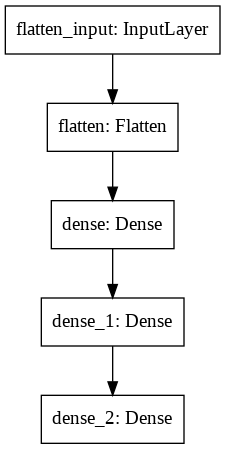

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png")

In [ ]:
pip install visualkeras

     |████████████████████████████████| 795 kB 10.0 MB/s 


In [ ]:
import visualkeras
visualkeras.layered_view(model)

In [ ]:
pip install keras_sequential_ascii

  Created wheel for keras-sequential-ascii: filename=keras_sequential_ascii-0.1.1-py3-none-any.whl size=3062 sha256=1baa257f6320a95d232a505c8c32e0b4ead85406655fb3a96c187155668a4ae7
  Stored in directory: /root/.cache/pip/wheels/4e/99/75/8910ced4b40e8c20088c237fa706b32ac758321482ae2659e3
Successfully built keras-sequential-ascii


In [ ]:
from keras_sequential_ascii import keras2ascii
keras2ascii(model)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####     28   28    1
             Flatten   ||||| -------------------         0     0.0%
                       #####         784
               Dense   XXXXX -------------------    401920    85.7%
                relu   #####         512
               Dense   XXXXX -------------------     65664    14.0%
                relu   #####         128
               Dense   XXXXX -------------------      1290     0.3%
          softmax_v2   #####          10


In [ ]:
pip install keract

flatten_input (1, 28, 28, 1) 


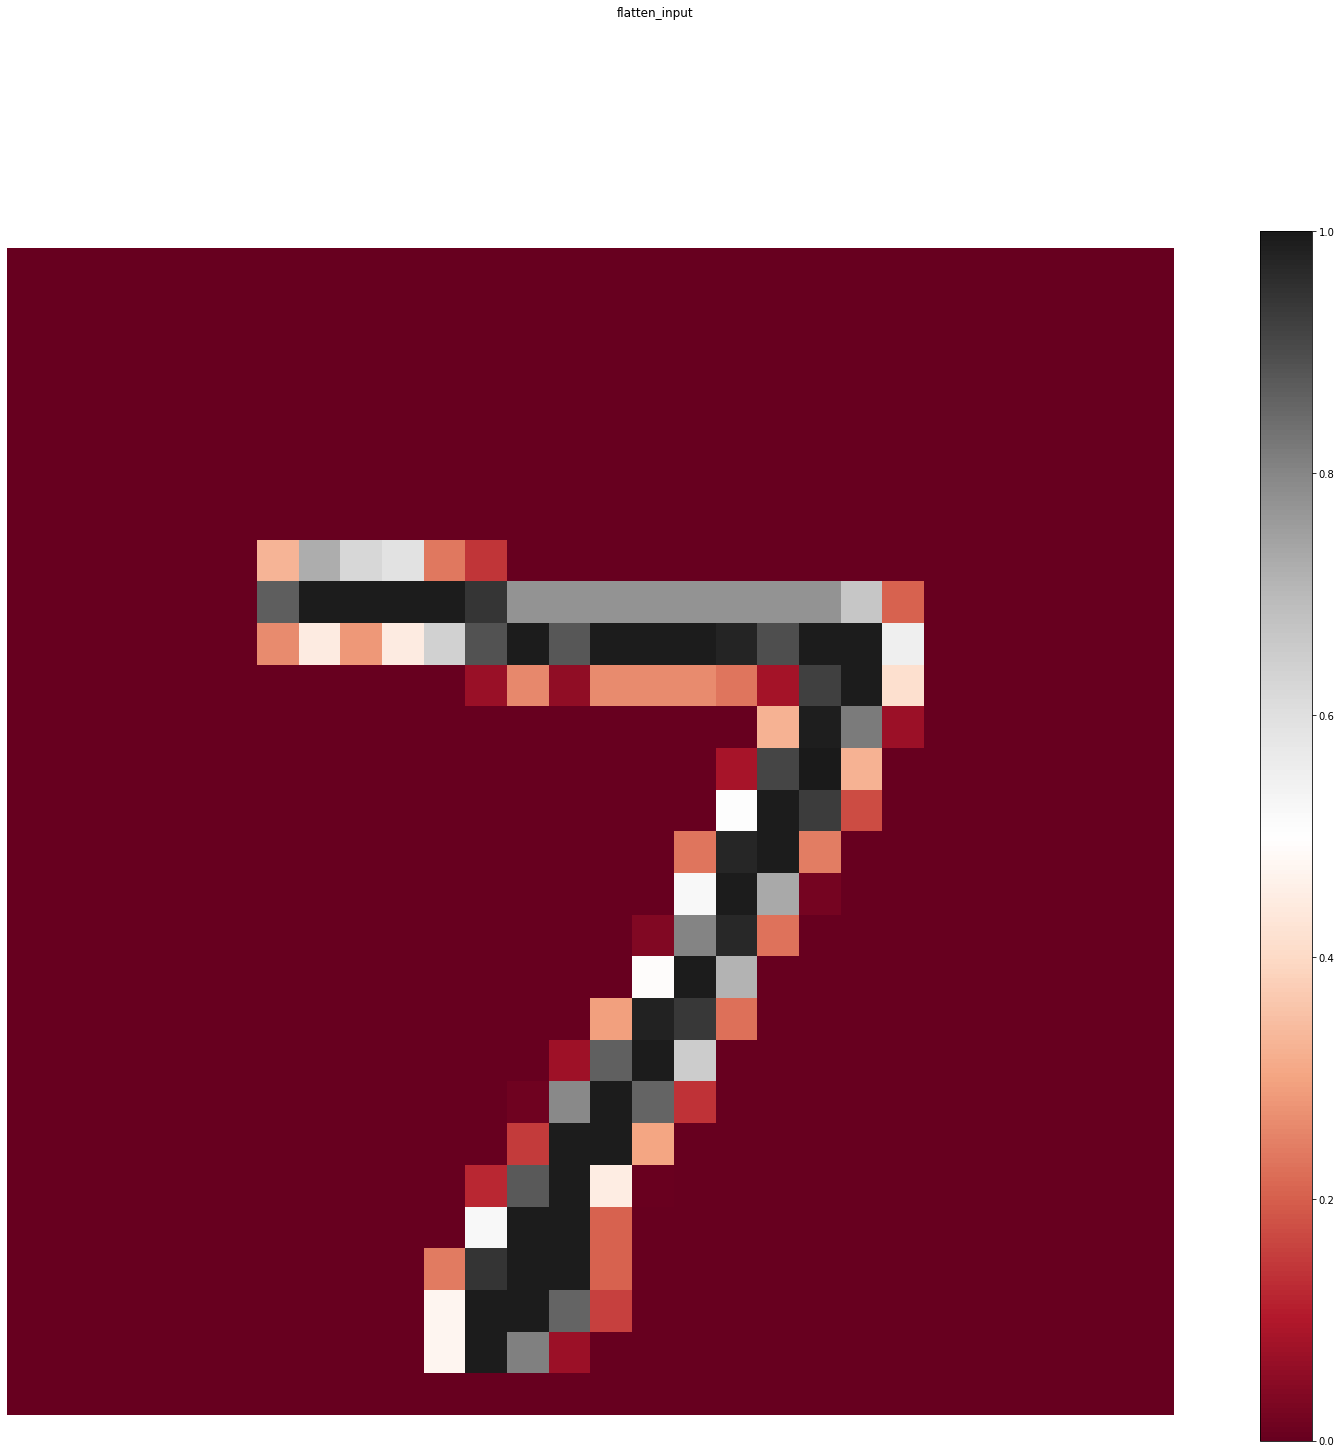

flatten (1, 784) 


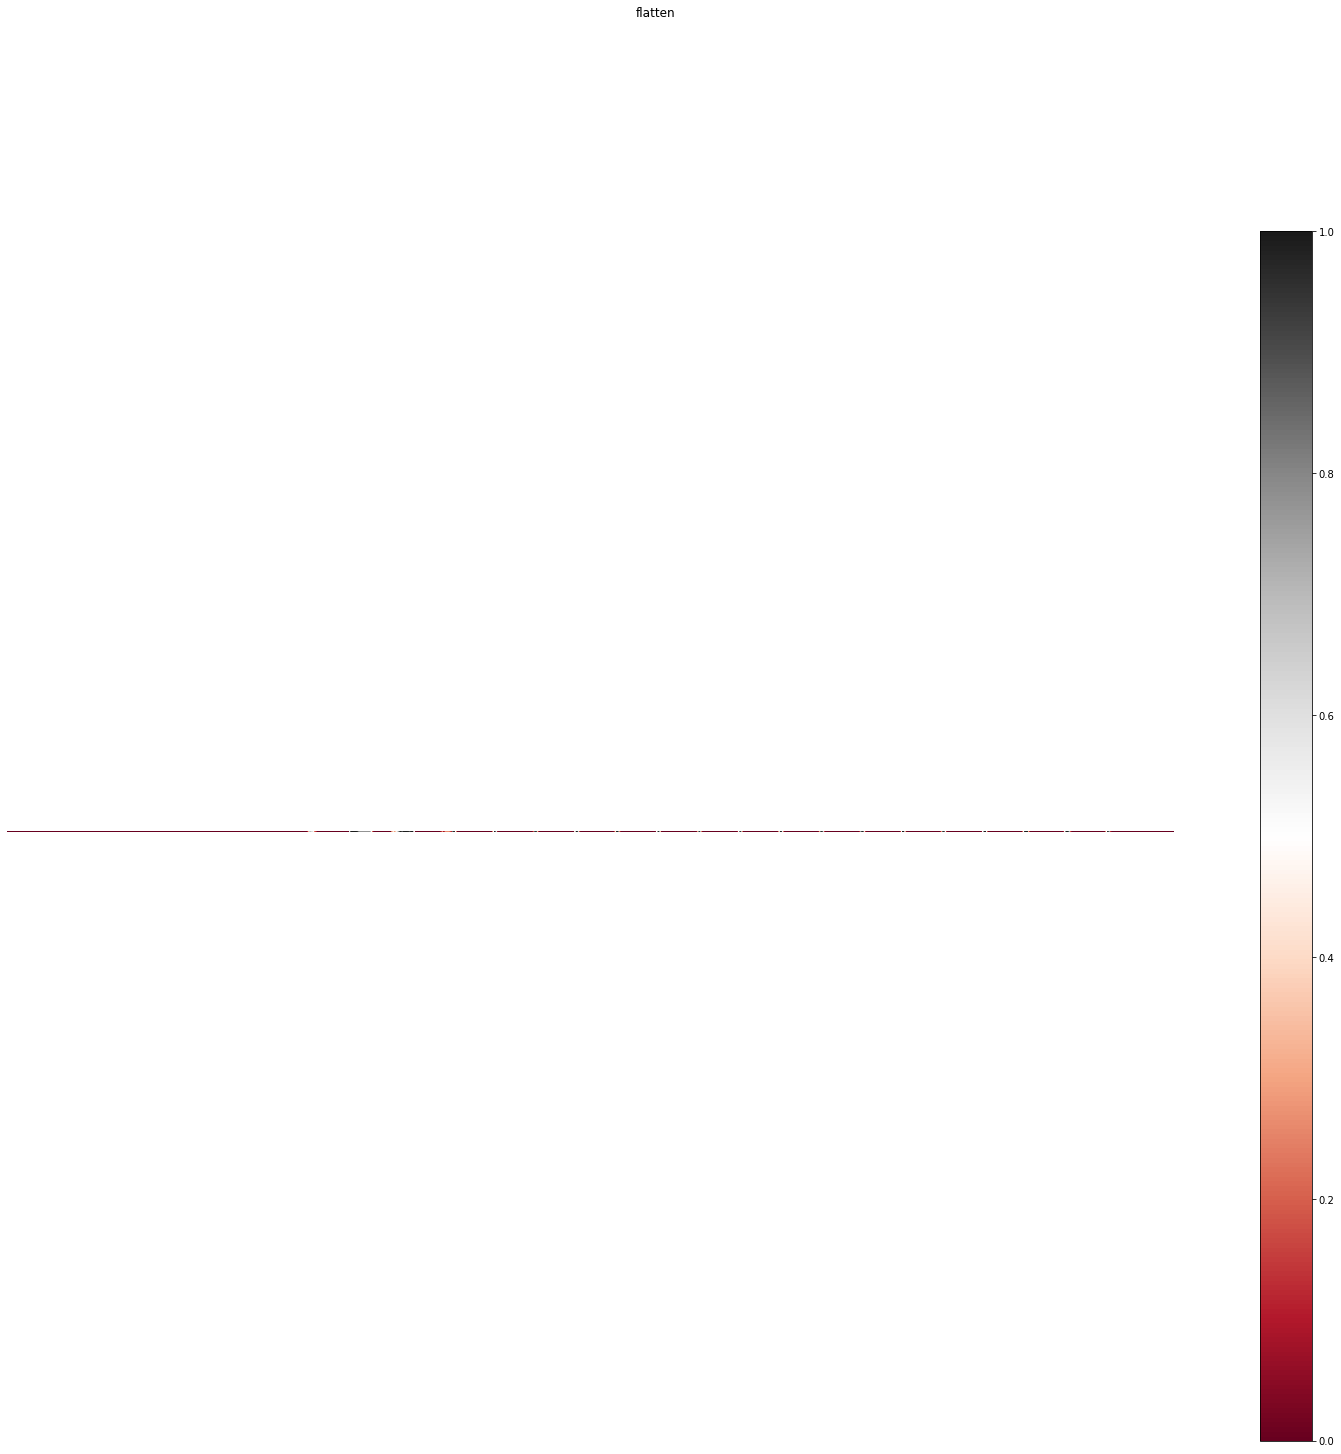

dense (1, 512) 


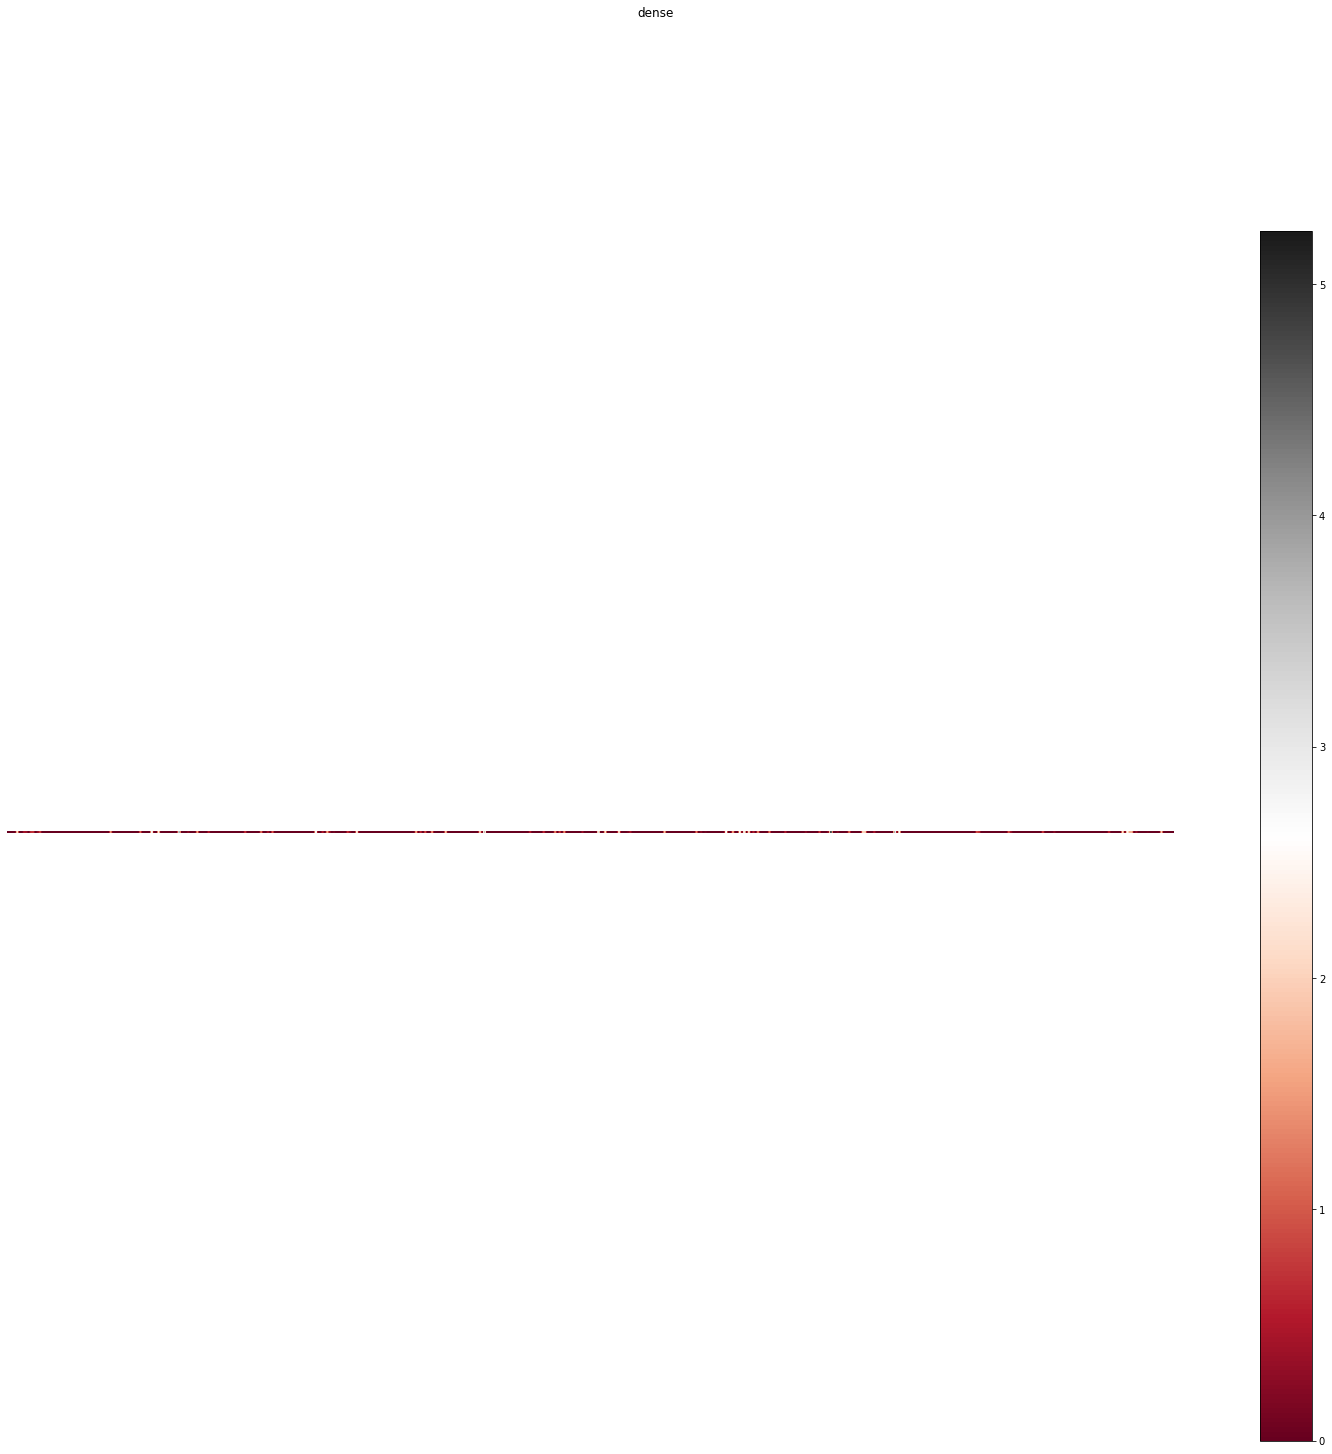

dense_1 (1, 128) 


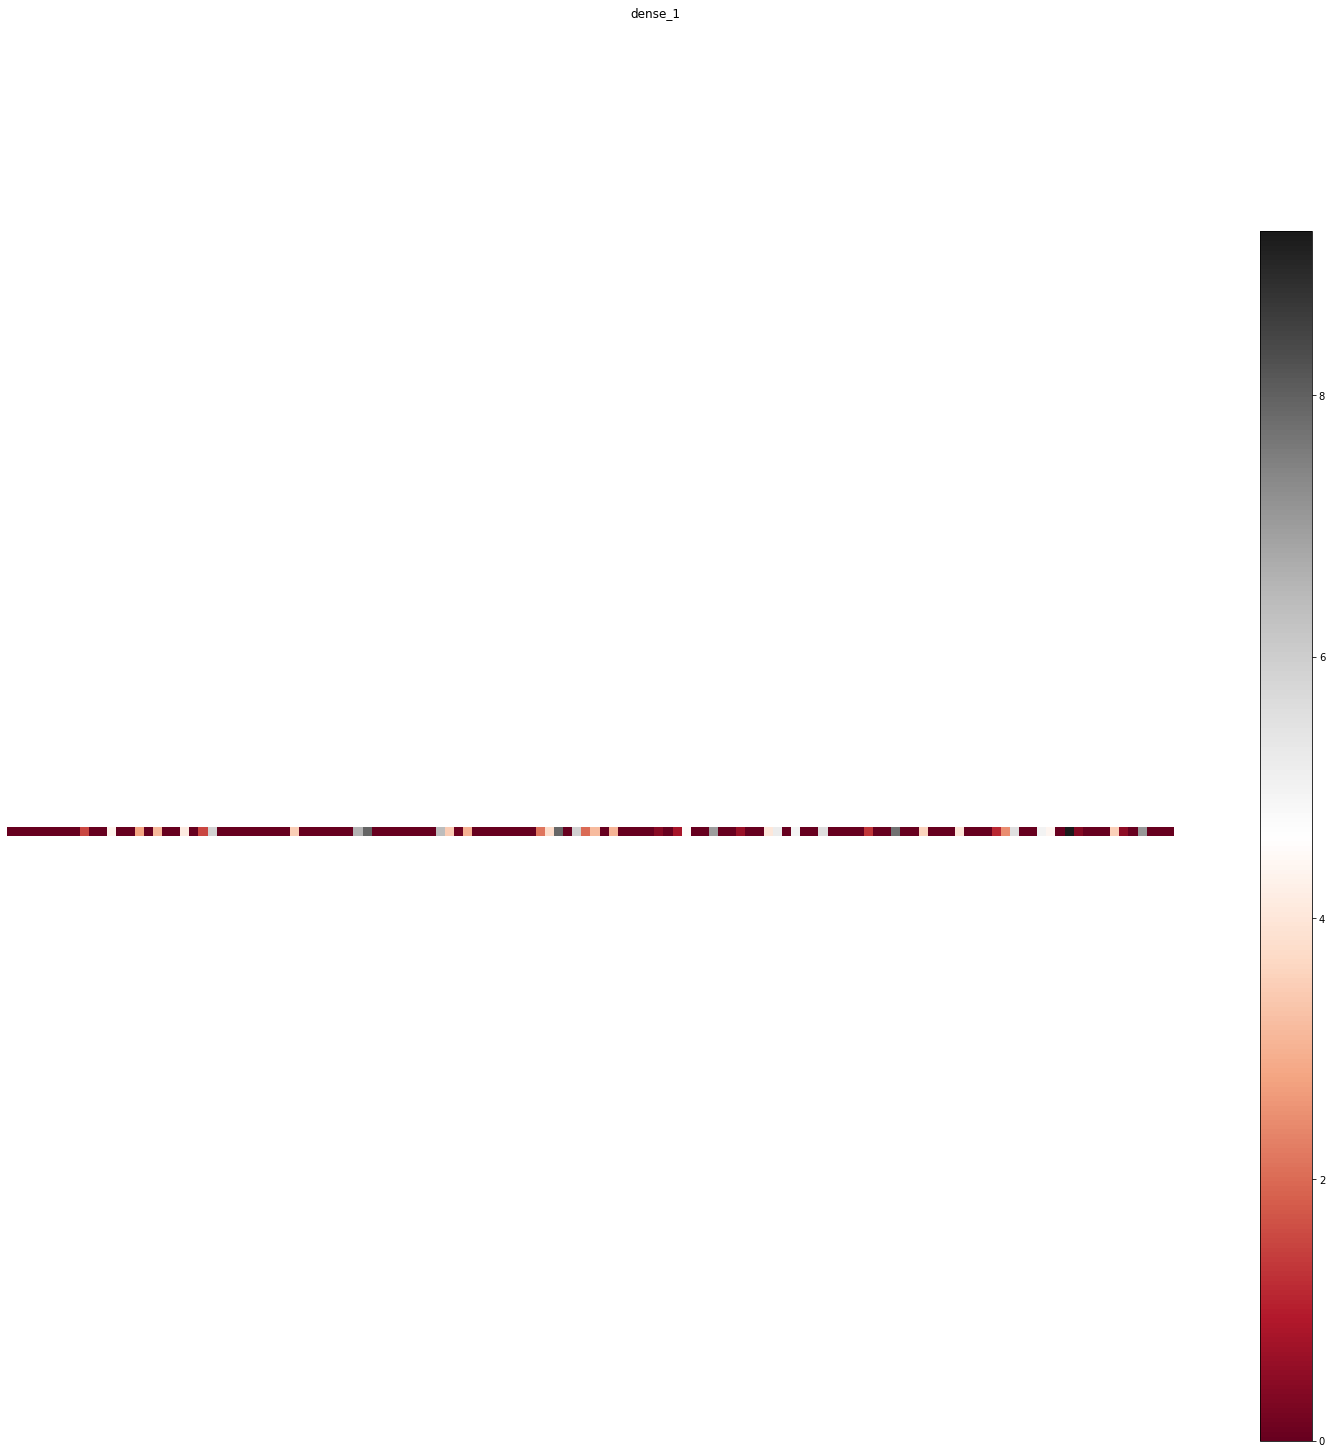

dense_2 (1, 10) 


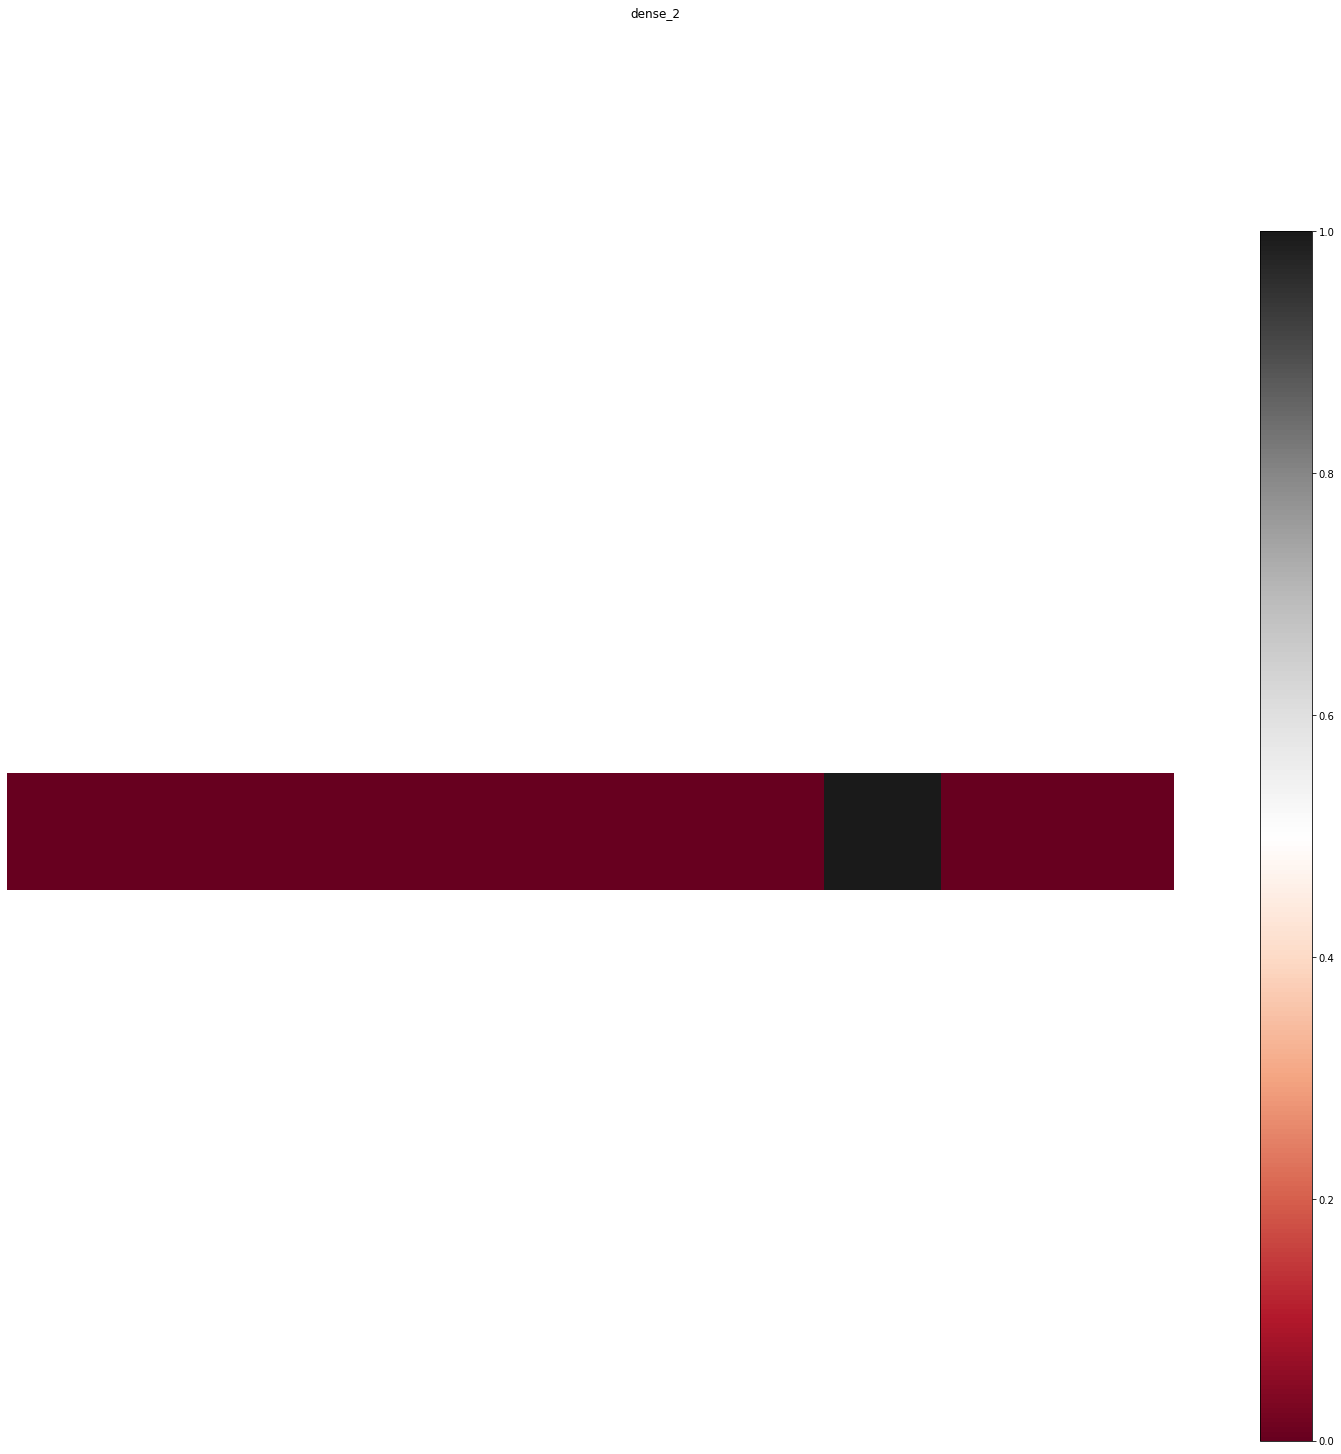

In [ ]:
from keract import get_activations, display_activations
keract_inputs = X_test[:1]
keract_targets = Y_test[:1]
activations = get_activations(model, keract_inputs)
display_activations(activations, cmap="RdGy", save=False)

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
#Reading the Mnist Train Csv File
data = pd.read_csv('/content/drive/MyDrive/train.csv')
data.head(2)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#changing all data in CSV to an Array
data = np.array(data)
m, n = data.shape 
#Shuffling the data so we can avoid the overfitting if happens
np.random.shuffle(data) 

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
#One hot encoding or categorzing the data images into their respective classes
Y_train = data_train[0]
#Desiging the training set of the model
X_train = data_train[1:n]
#Normalizing the dataset
X_train = X_train / 255.
#Checkting the training dataset shape
_,m_train = X_train.shape
#Get Predictions
def get_predictions(A2):
    #np.argmax returns the max value un an axis
    return np.argmax(A2, 0)
def get_accuracy(predictions, Y):
    #Getting accuracy of the predcited images
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size
def gradient_descent(X, Y, alpha, iterations):
    #Calcualting the gradient descent, loss
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Epochs: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2
def init_params():
    #Randomly initialzing the weight bias parameters
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    #Making Relu activation function to add non linearity in the model
    return np.maximum(Z, 0)
def softmax(Z):
    #Used for classification 
    A = np.exp(Z) / sum(np.exp(Z))
    return A
def forward_prop(W1, b1, W2, b2, X):
    #Here we are doing the forward propogation to calculate the output of model 
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2
def ReLU_deriv(Z):
    return Z > 0
def one_hot(Y):
    #Categorzing the dataset into their respective classes
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    #Calcualting the partial derivatives
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    #Updating weights using back propogation technque
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [ ]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Epochs:  0
[7 7 7 ... 5 6 1] [0 8 7 ... 8 0 5]
0.1098780487804878
Epochs:  10
[7 7 7 ... 8 0 1] [0 8 7 ... 8 0 5]
0.20002439024390245
Epochs:  20
[7 7 7 ... 8 0 3] [0 8 7 ... 8 0 5]
0.28180487804878046
Epochs:  30
[7 7 7 ... 8 0 3] [0 8 7 ... 8 0 5]
0.38002439024390244
Epochs:  40
[7 7 7 ... 8 0 3] [0 8 7 ... 8 0 5]
0.45102439024390245
Epochs:  50
[0 7 7 ... 8 0 3] [0 8 7 ... 8 0 5]
0.4998780487804878
Epochs:  60
[0 4 9 ... 8 0 3] [0 8 7 ... 8 0 5]
0.5372439024390244
Epochs:  70
[0 4 9 ... 8 0 3] [0 8 7 ... 8 0 5]
0.5683170731707317
Epochs:  80
[0 4 9 ... 8 0 3] [0 8 7 ... 8 0 5]
0.5947560975609756
Epochs:  90
[0 4 9 ... 8 0 3] [0 8 7 ... 8 0 5]
0.6175853658536585
Epochs:  100
[0 8 9 ... 8 0 3] [0 8 7 ... 8 0 5]
0.6367560975609756
Epochs:  110
[0 8 9 ... 8 0 3] [0 8 7 ... 8 0 5]
0.6550731707317073
Epochs:  120
[0 8 9 ... 8 0 3] [0 8 7 ... 8 0 5]
0.6710243902439025
Epochs:  130
[0 8 9 ... 8 0 3] [0 8 7 ... 8 0 5]
0.6868780487804879
Epochs:  140
[0 8 9 ... 8 0 3] [0 8 7 ... 8 0 5]
0.6998

Prediction:  [0]
Label:  0


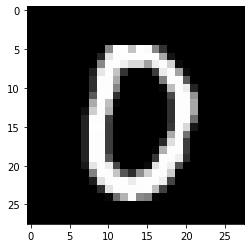

Prediction:  [8]
Label:  8


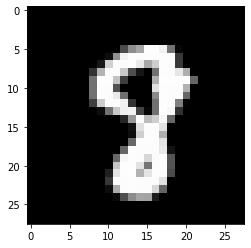

Prediction:  [9]
Label:  7


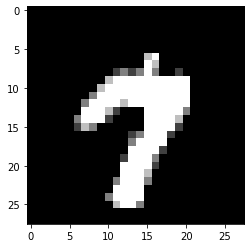

Prediction:  [8]
Label:  8


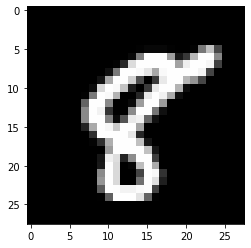

Prediction:  [0]
Label:  0


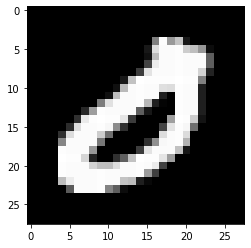

Prediction:  [1]
Label:  1


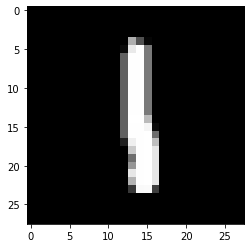

Prediction:  [8]
Label:  8


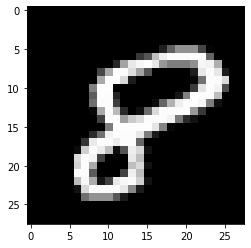

Prediction:  [3]
Label:  3


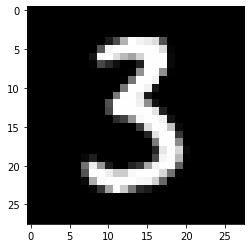

Prediction:  [0]
Label:  0


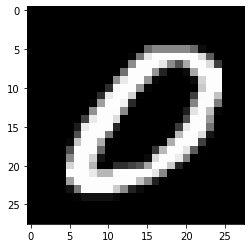

Prediction:  [7]
Label:  7


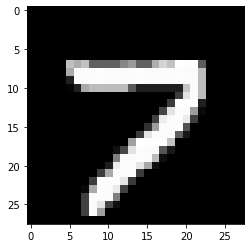

In [ ]:
def make_predictions(X, W1, b1, W2, b2):
    #Making the predictions
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    #Testing the predictions with the labels we have
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()
for i in range(0,10):
  test_prediction(i, W1, b1, W2, b2)

FASHION_MNIST

4423680/4422102 [==============================] - 0s 0us/step
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4732 - accuracy: 0.8289
Epoch 2/10
1875/1875 [===========================

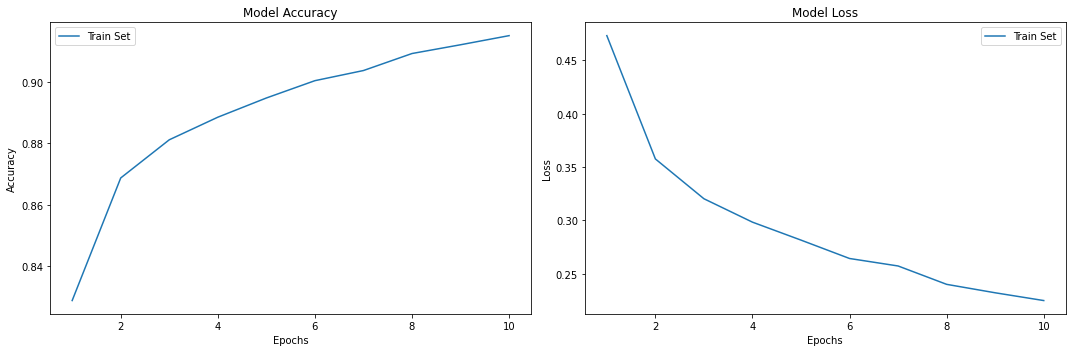

In [ ]:
#Importing all useful libraries 
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from keras import models
from keras.losses import categorical_crossentropy
from keras import metrics
import matplotlib.pyplot as plt
#Loadind dataset into train test 
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()
#Reshaping the images
X_train = X_train.reshape(X_train.shape[0],28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
#Changing the datatype of Image arrays to Float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#Normalizing the data arrays
X_train /= 255
X_test /= 255
#One hot Encoding or Categorizing Images to their respective classes
Y_train =tf.keras.utils.to_categorical(Y_train,10)
Y_test = tf.keras.utils.to_categorical(Y_test,10)
print(Y_train[0])
#Making a sequential based model 
model = tf.keras.models.Sequential(
    [
     tf.keras.layers.Flatten(input_shape = (28,28,1)),
     tf.keras.layers.Dense(512 ,activation=tf.nn.relu),
     tf.keras.layers.Dense(128, activation=tf.nn.relu),
     tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ]
    )
#Compiling the above made model with optimizer, Loss, and Metrics
model.compile(optimizer=tf.optimizers.Adam(),loss=['categorical_crossentropy'],metrics=['accuracy'])
model.summary()
#Training our model
history=model.fit(X_train, Y_train,batch_size=32, epochs=10,verbose=1 )
#Saving our model
tf.keras.models.save_model(model,filepath="/content/Fashion-mnist.h5")
#Plotting the Accuracy Vs Loss Graph
acc = history.history['accuracy']
loss = history.history['loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()


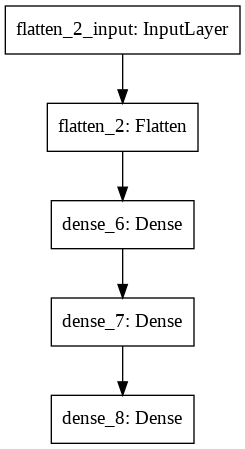

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file="Fashion_model.png")

In [ ]:
pip install visualkeras

In [ ]:
import visualkeras
visualkeras.layered_view(model)

In [ ]:
pip install keras_sequential_ascii

In [ ]:
from keras_sequential_ascii import keras2ascii
keras2ascii(model)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####     28   28    1
             Flatten   ||||| -------------------         0     0.0%
                       #####         784
               Dense   XXXXX -------------------    401920    85.7%
                relu   #####         512
               Dense   XXXXX -------------------     65664    14.0%
                relu   #####         128
               Dense   XXXXX -------------------      1290     0.3%
          softmax_v2   #####          10


In [ ]:
pip install keract

flatten_2_input (1, 28, 28, 1) 


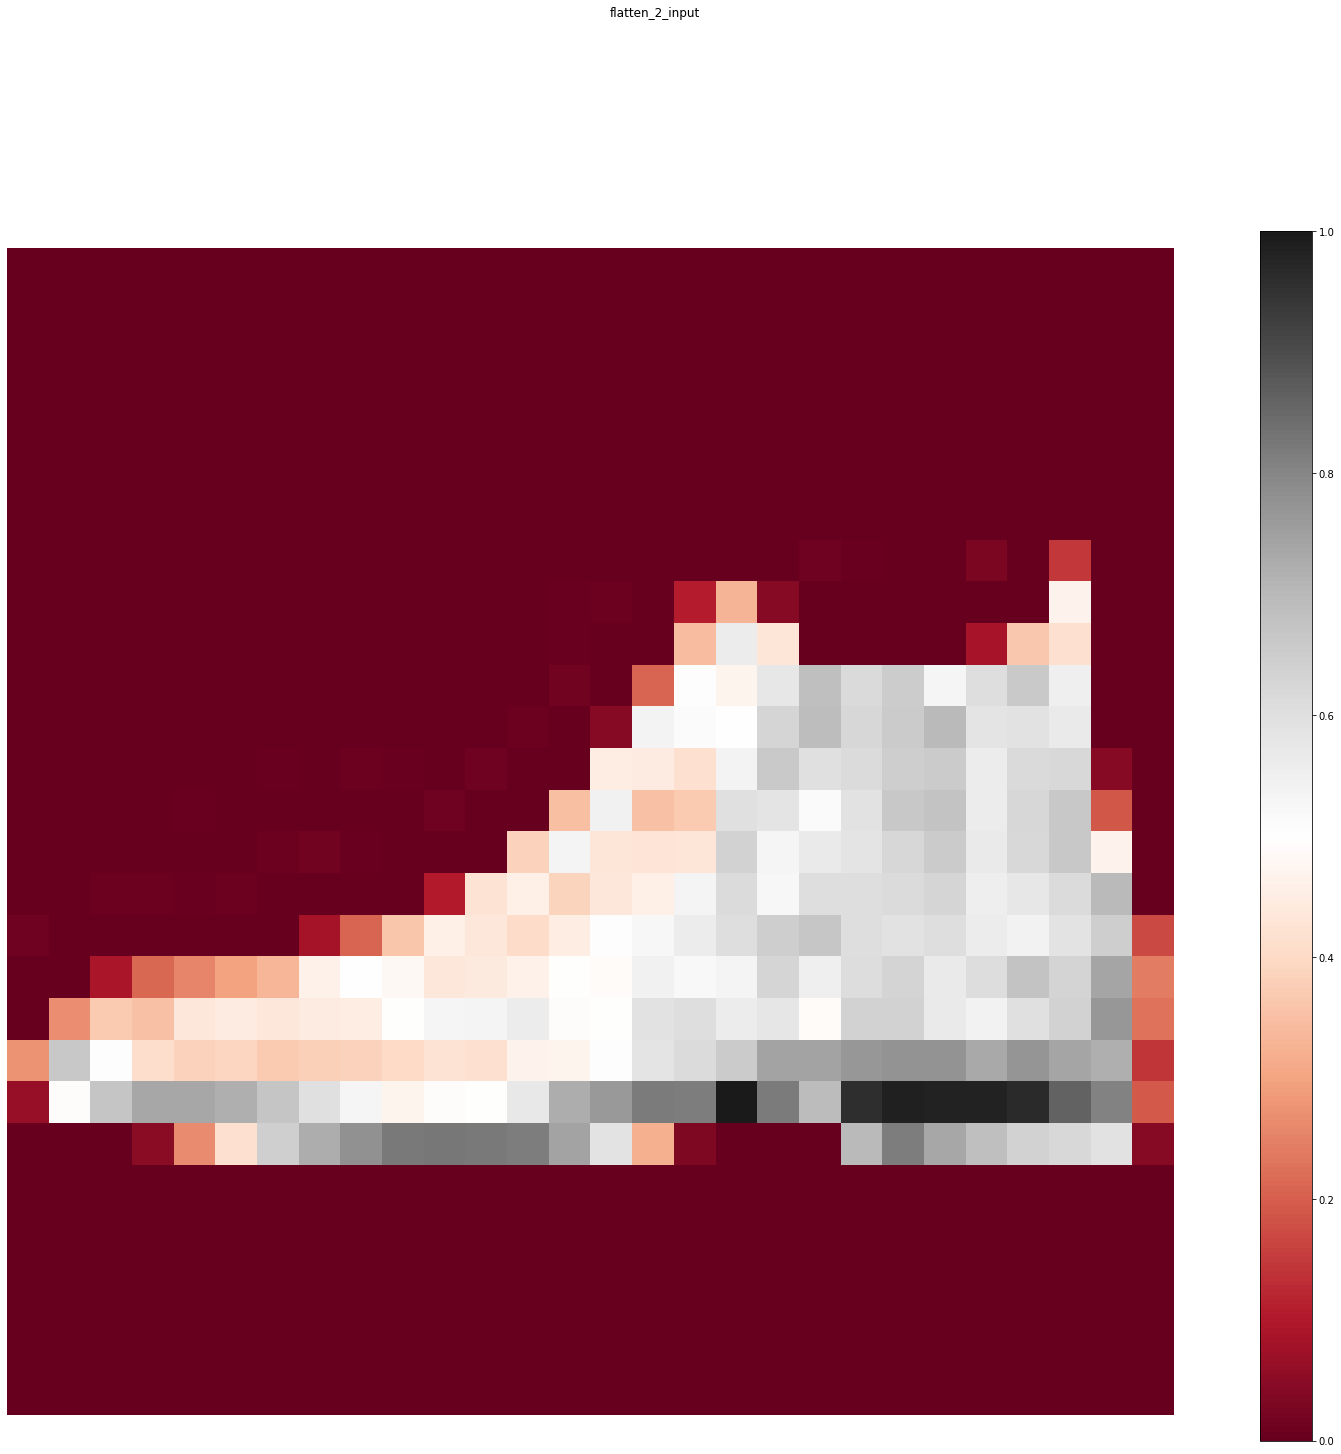

flatten_2 (1, 784) 


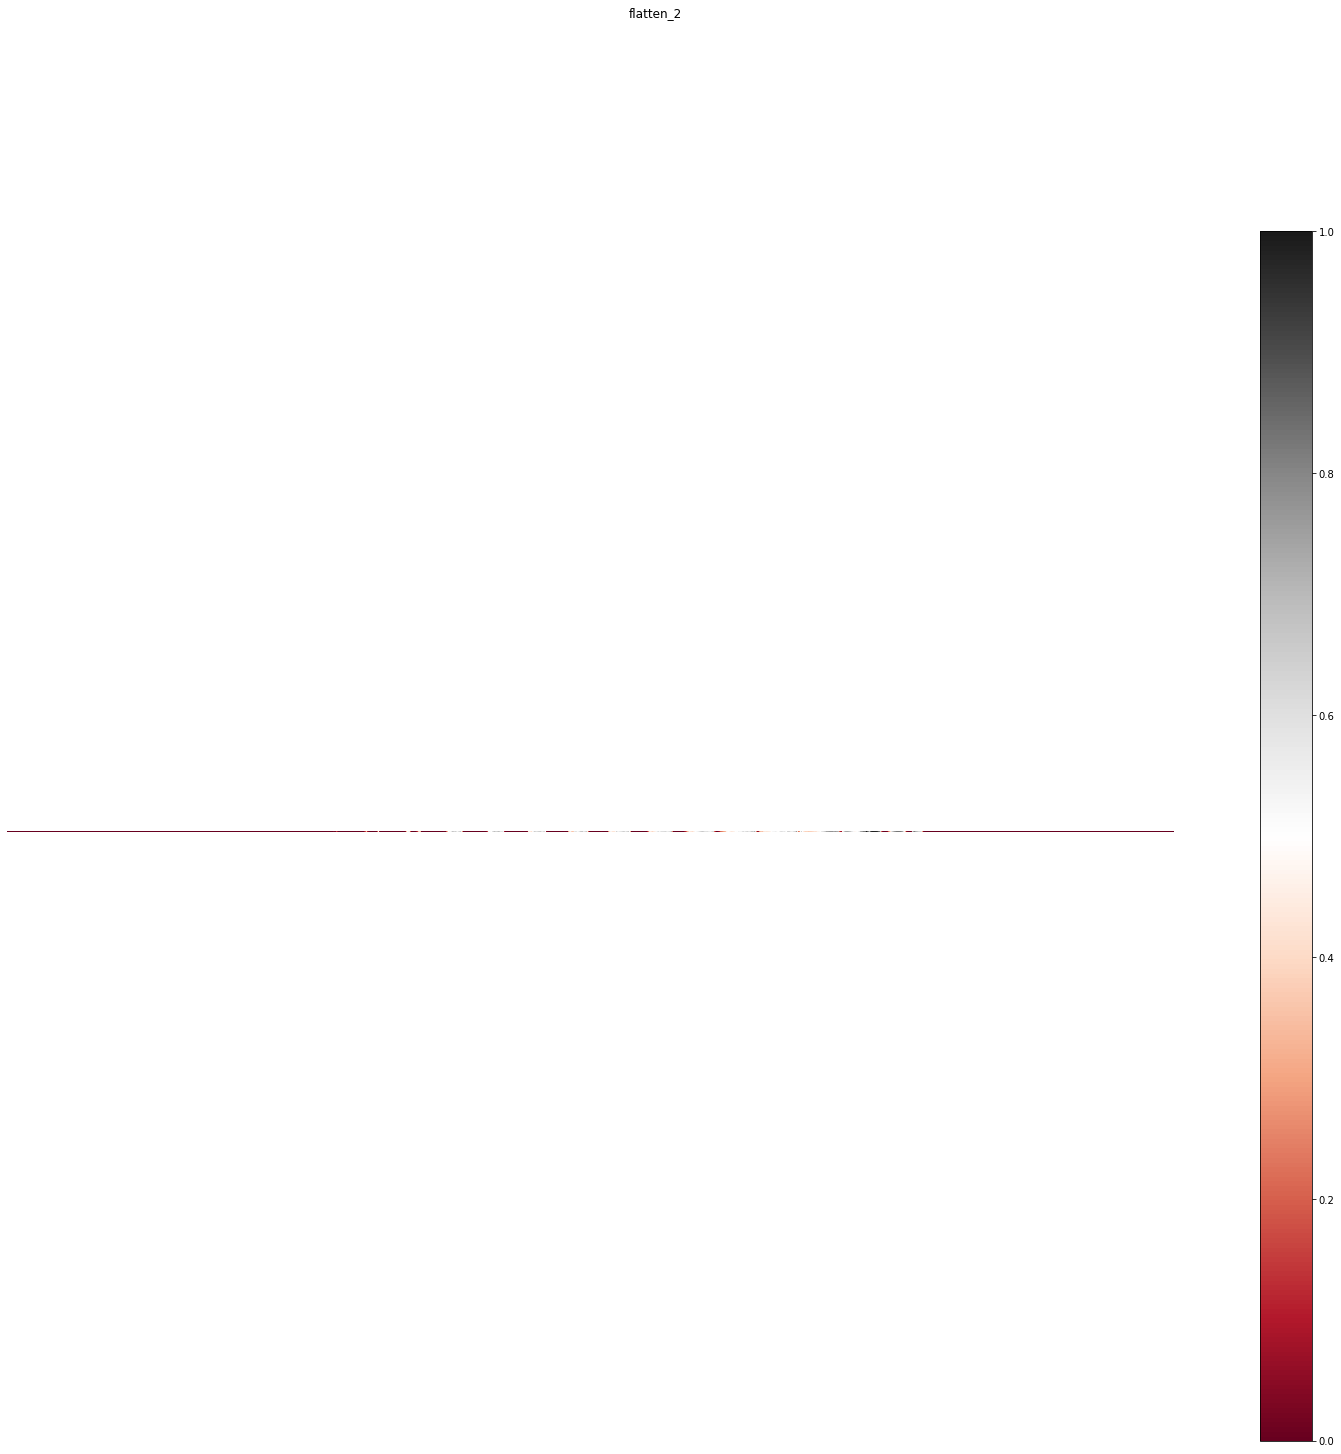

dense_6 (1, 512) 


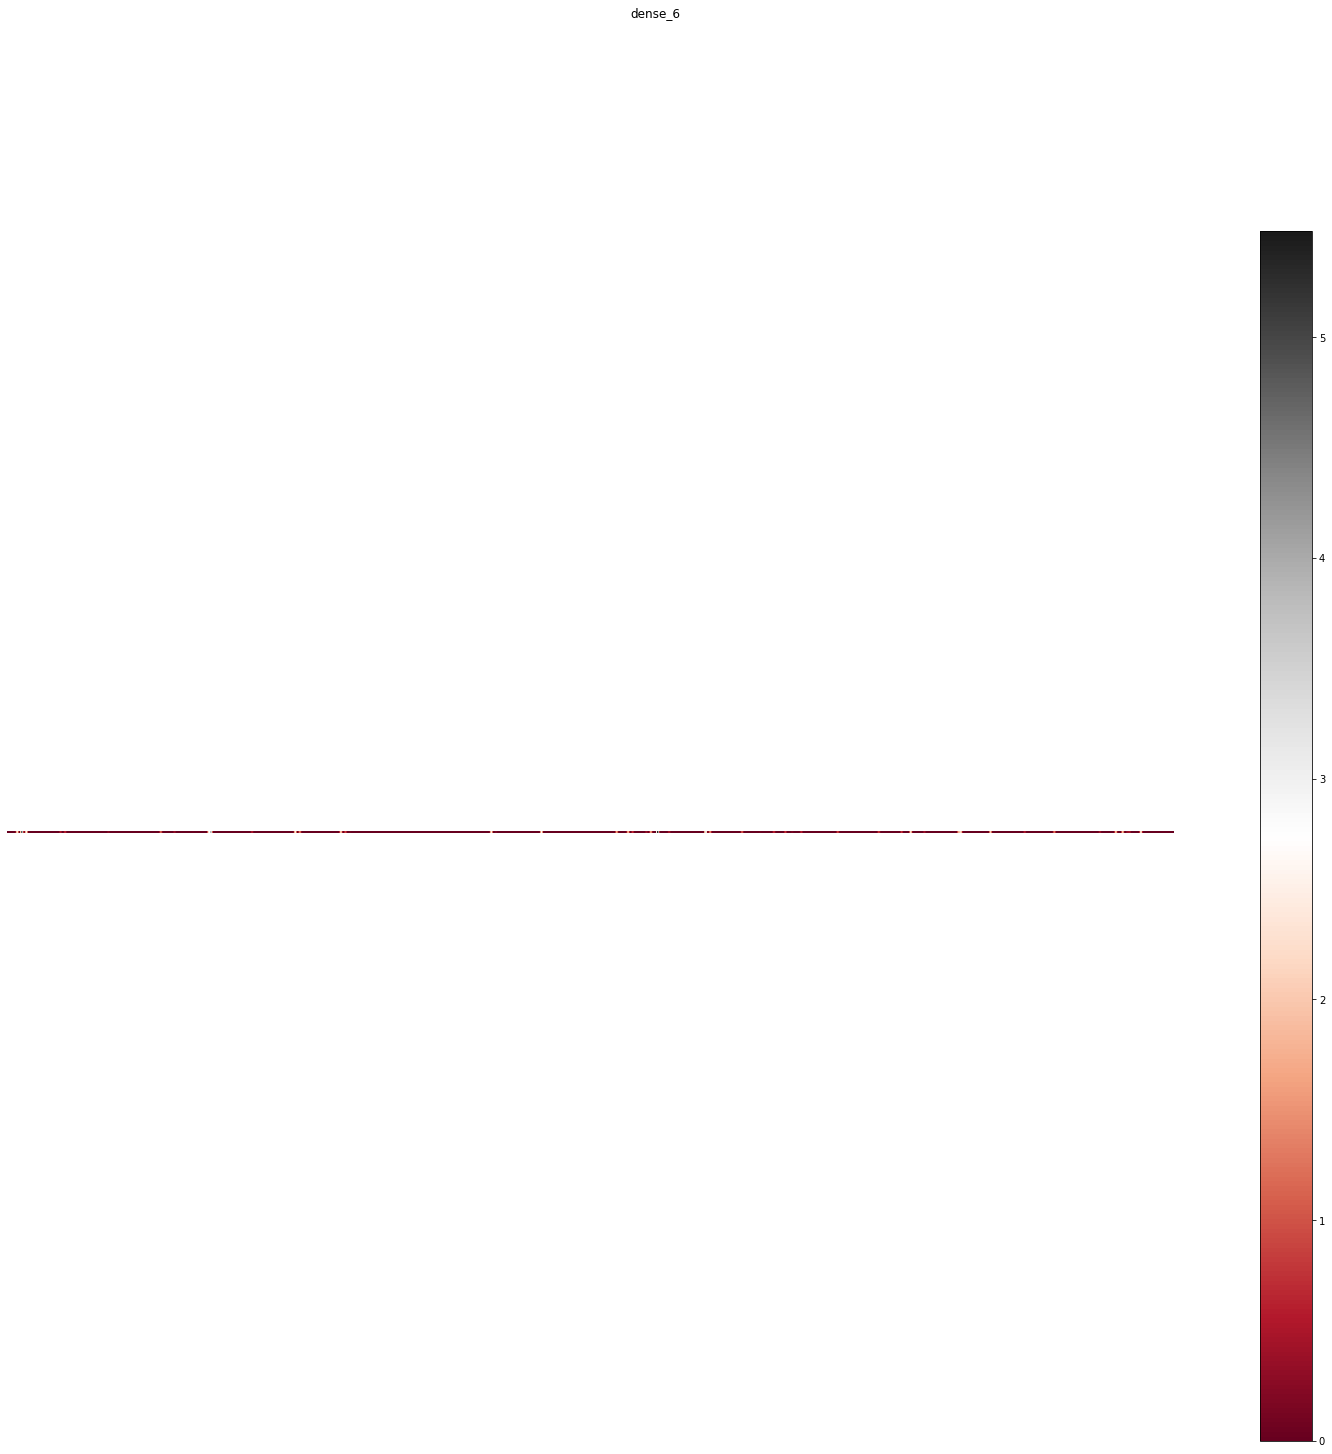

dense_7 (1, 128) 


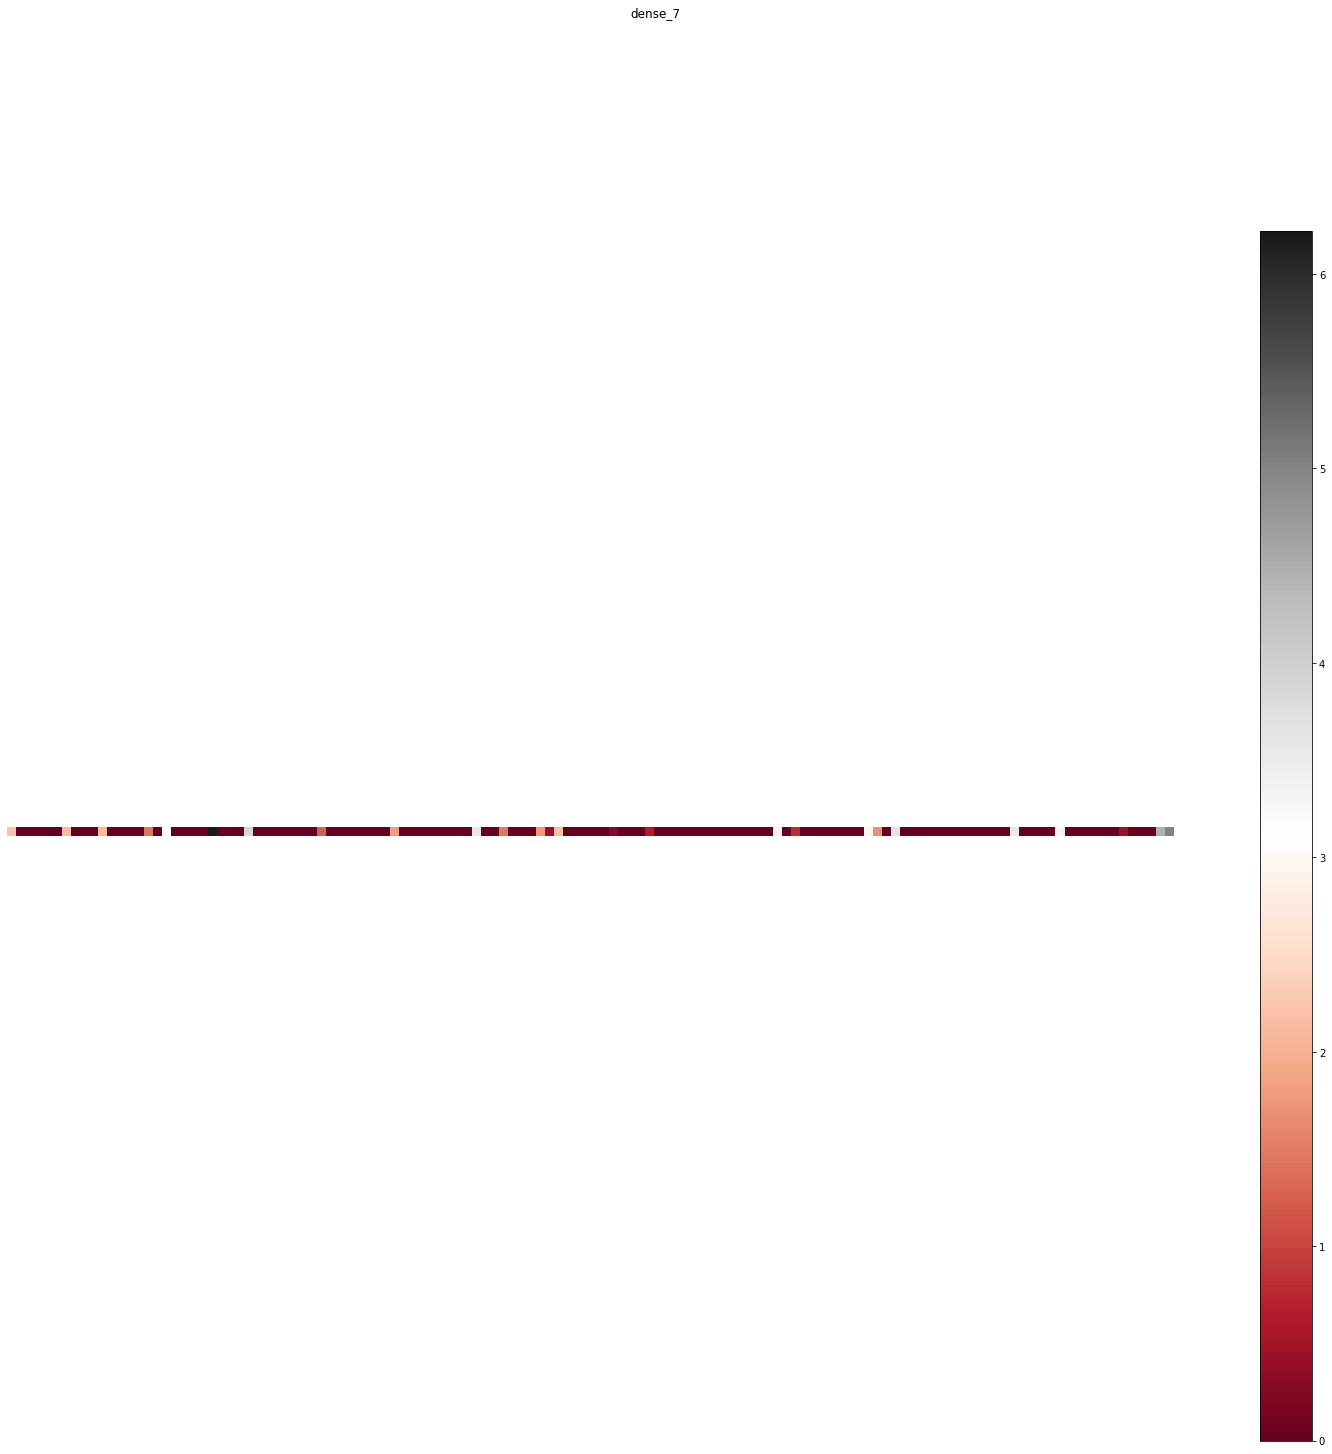

dense_8 (1, 10) 


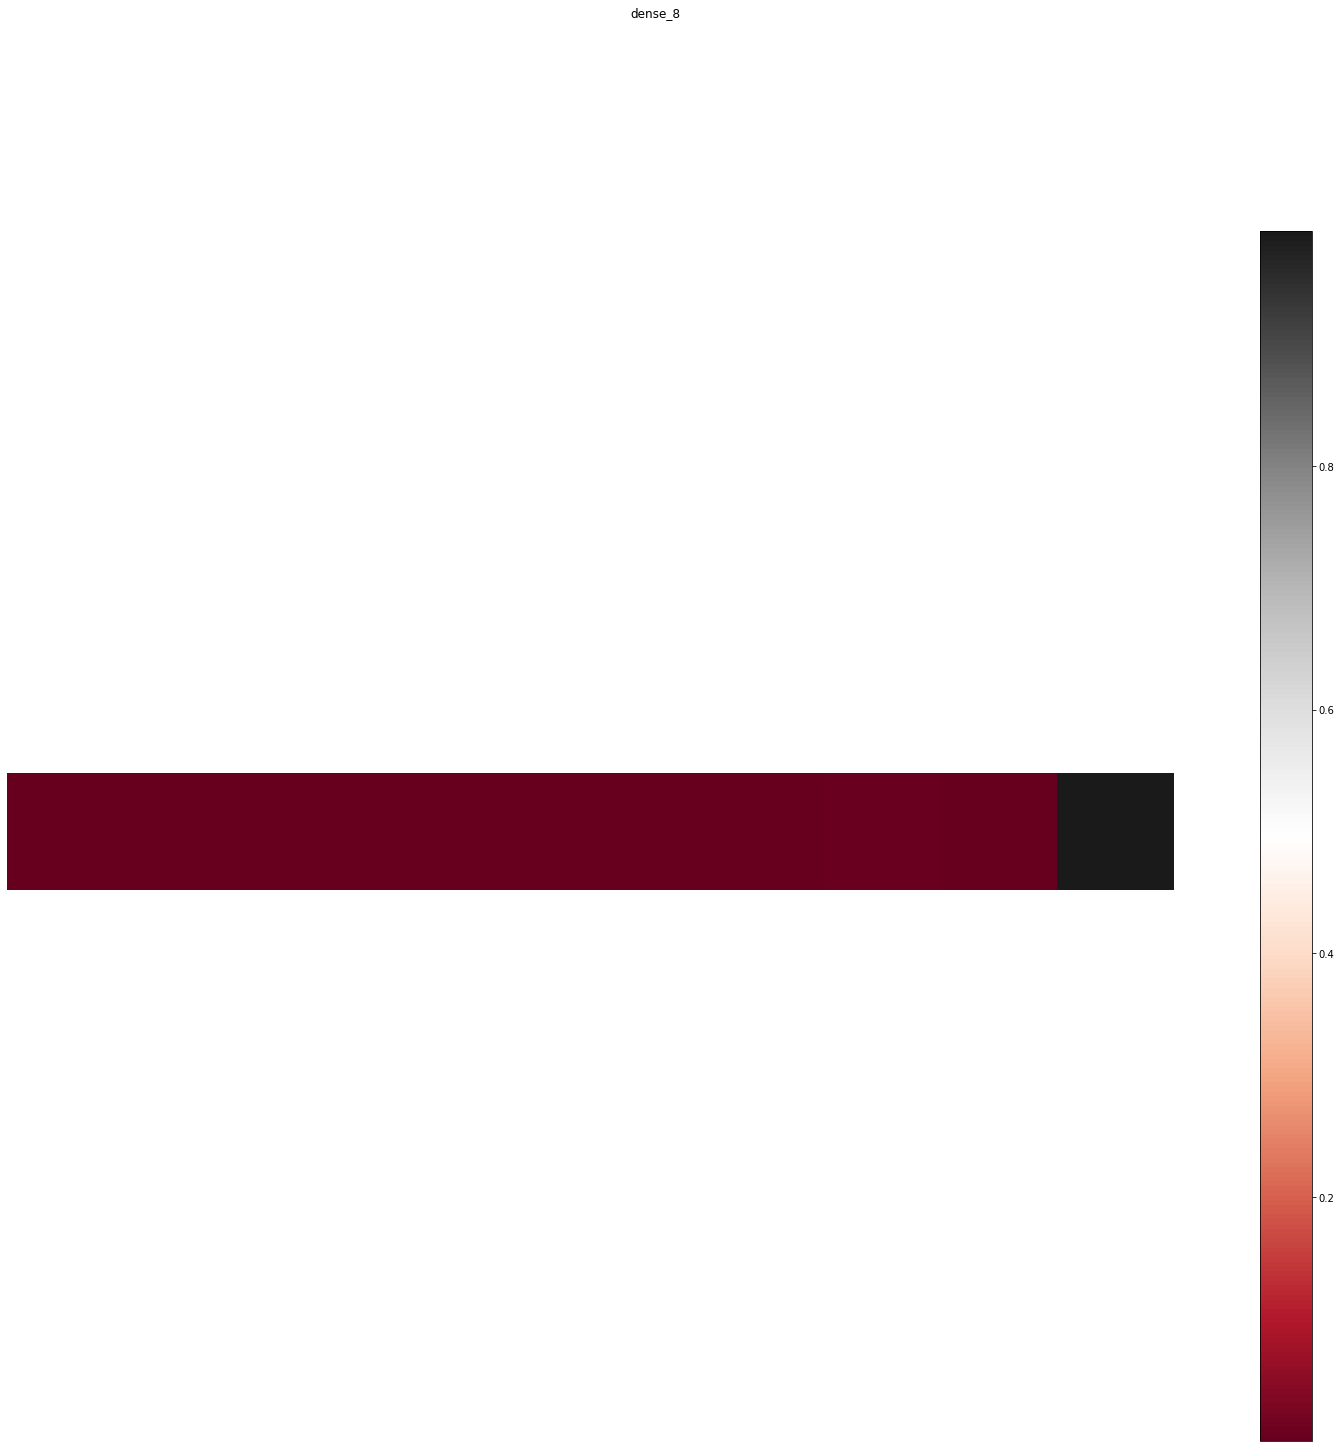

In [ ]:
from keract import get_activations, display_activations
keract_inputs = X_test[:1]
keract_targets = Y_test[:1]
activations = get_activations(model, keract_inputs)
display_activations(activations, cmap="RdGy", save=False)

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
#Reading the Fashion Mnist Train Csv File
data = pd.read_csv('/content/drive/MyDrive/fashion-mnist_train.csv')

data.head(2)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#changing all data in CSV to an Array
data = np.array(data)
m, n = data.shape 
#Shuffling the data so we can avoid the overfitting if happens
np.random.shuffle(data) 

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
#One hot encoding or categorzing the data images into their respective classes
Y_train = data_train[0]
#Desiging the training set of the model
X_train = data_train[1:n]
#Normalizing the dataset
X_train = X_train / 255.
#Checkting the training dataset shape
_,m_train = X_train.shape
#Get Predictions
def get_predictions(A2):
    #np.argmax returns the max value un an axis
    return np.argmax(A2, 0)
def get_accuracy(predictions, Y):
    #Getting accuracy of the predcited images
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size
def gradient_descent(X, Y, alpha, iterations):
    #Calcualting the gradient descent, loss
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Epochs: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2
def init_params():
    #Randomly initialzing the weight bias parameters
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    #Making Relu activation function to add non linearity in the model
    return np.maximum(Z, 0)
def softmax(Z):
    #Used for classification 
    A = np.exp(Z) / sum(np.exp(Z))
    return A
def forward_prop(W1, b1, W2, b2, X):
    #Here we are doing the forward propogation to calculate the output of model 
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2
def ReLU_deriv(Z):
    return Z > 0
def one_hot(Y):
    #Categorzing the dataset into their respective classes
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    #Calcualting the partial derivatives
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    #Updating weights using back propogation technque
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [ ]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Epochs:  0
[1 6 6 ... 1 6 6] [1 2 1 ... 6 5 4]
0.1198135593220339
Epochs:  10
[1 4 1 ... 1 4 4] [1 2 1 ... 6 5 4]
0.31808474576271184
Epochs:  20
[1 4 1 ... 3 4 4] [1 2 1 ... 6 5 4]
0.40952542372881356
Epochs:  30
[1 4 1 ... 3 4 4] [1 2 1 ... 6 5 4]
0.478864406779661
Epochs:  40
[1 2 1 ... 3 8 4] [1 2 1 ... 6 5 4]
0.544593220338983
Epochs:  50
[1 2 1 ... 3 6 4] [1 2 1 ... 6 5 4]
0.5836610169491525
Epochs:  60
[1 2 1 ... 3 8 4] [1 2 1 ... 6 5 4]
0.6127966101694915
Epochs:  70
[1 2 1 ... 3 8 4] [1 2 1 ... 6 5 4]
0.6299830508474576
Epochs:  80
[1 2 1 ... 3 8 4] [1 2 1 ... 6 5 4]
0.6427118644067796
Epochs:  90
[1 2 1 ... 3 8 4] [1 2 1 ... 6 5 4]
0.6525593220338983
Epochs:  100
[1 2 1 ... 3 8 4] [1 2 1 ... 6 5 4]
0.6611016949152543
Epochs:  110
[1 2 1 ... 3 8 4] [1 2 1 ... 6 5 4]
0.6692542372881356
Epochs:  120
[1 2 1 ... 3 8 4] [1 2 1 ... 6 5 4]
0.6756949152542373
Epochs:  130
[1 2 1 ... 3 8 4] [1 2 1 ... 6 5 4]
0.682271186440678
Epochs:  140
[1 2 1 ... 3 8 4] [1 2 1 ... 6 5 4]
0.686932203

Prediction:  T-shirt
Label:  Trouser


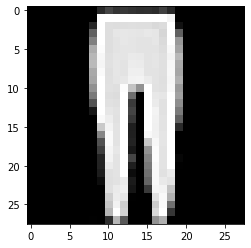

Prediction:  Trouser
Label:  Pullover


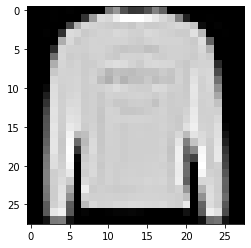

Prediction:  Pullover
Label:  Trouser


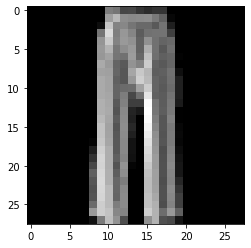

Prediction:  Dress
Label:  Shirt


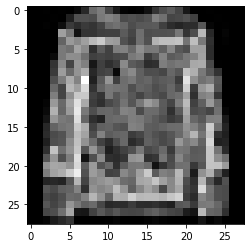

Prediction:  Coat
Label:  Trouser


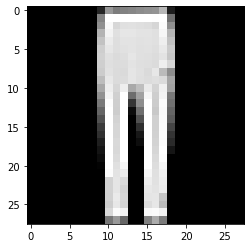

Prediction:  Sandals
Label:  Sneaker


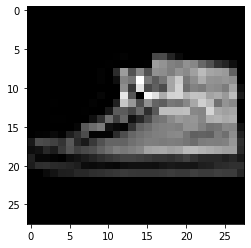

Prediction:  Shirt
Label:  Dress


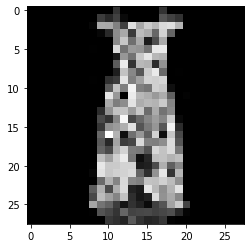

Prediction:  Sneaker
Label:  Bag


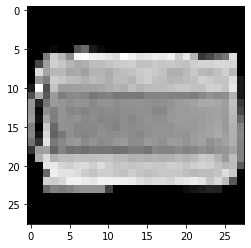

Prediction:  Bag
Label:  Coat


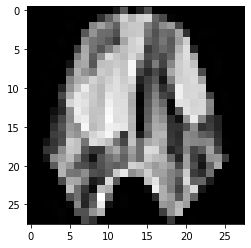

Prediction:  Ankle Boots
Label:  Sneaker


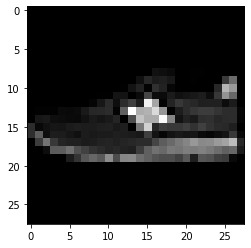

In [ ]:
def make_predictions(X, W1, b1, W2, b2):
    #Making the predictions
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    #Testing the predictions with the labels we have
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    labels = Y_train[index]
    LABEL_NAMES = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandals', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boots']
    x=np.argmax(index)
    y=np.argmax(prediction)
    label=LABEL_NAMES[labels]
    pred=LABEL_NAMES[index]
    print("Prediction: ",pred )
    print("Label: ", label )
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()
for i in range(0,10):
  test_prediction(i, W1, b1, W2, b2)

CIFAR10

170500096/170498071 [==============================] - 4s 0us/step
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_13 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1290      
Total params: 1,640,330
Trainable params: 1,640,330
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.8787 - accuracy: 0.3269
Epoch 2/10
1563/1563 [==================

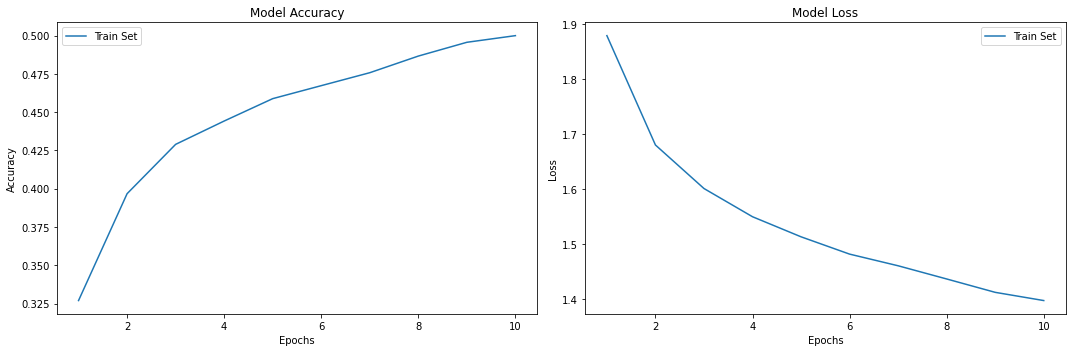

In [ ]:
#Importing all useful libraries 
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from keras import models
from keras.losses import categorical_crossentropy
from keras import metrics
import matplotlib.pyplot as plt
#Loadind dataset into train test 
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
#Reshaping the the images
X_train = X_train.reshape(X_train.shape[0],32, 32,3)
X_test = X_test.reshape(X_test.shape[0], 32, 32,3)
#Changing the datatype of Image arrays to Float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#Normalizing the data arrays
X_train /= 255
X_test /= 255
#One hot Encoding or Categorizing Images to their respective classes
Y_train =tf.keras.utils.to_categorical(Y_train,10)
Y_test = tf.keras.utils.to_categorical(Y_test,10)
print(Y_train[0])
#Making a sequential based model 
model = tf.keras.models.Sequential(
    [
     tf.keras.layers.Flatten(input_shape = (32,32,3)),
     tf.keras.layers.Dense(512 ,activation=tf.nn.relu),
     tf.keras.layers.Dense(128, activation=tf.nn.relu),
     tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ]
    )
#Compiling the above made model with optimizer, Loss, and Metrics
model.compile(optimizer=tf.optimizers.Adam(),loss=['categorical_crossentropy'],metrics=['accuracy'])
model.summary()
#Training our model
history=model.fit(X_train, Y_train,batch_size=32, epochs=10,verbose=1 )
#Saving our model
tf.keras.models.save_model(model,filepath="/content/Cifar10.h5")
#Plotting the Accuracy Vs Loss Graph
acc = history.history['accuracy']
loss = history.history['loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()


In [ ]:
pip install visualkeras

In [ ]:
pip install keras_sequential_ascii

In [ ]:
pip install keract

In [ ]:
import visualkeras
visualkeras.layered_view(model)

In [ ]:
from keras_sequential_ascii import keras2ascii
keras2ascii(model)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####     32   32    3
             Flatten   ||||| -------------------         0     0.0%
                       #####        3072
               Dense   XXXXX -------------------   1573376    95.9%
                relu   #####         512
               Dense   XXXXX -------------------     65664     4.0%
                relu   #####         128
               Dense   XXXXX -------------------      1290     0.1%
          softmax_v2   #####          10


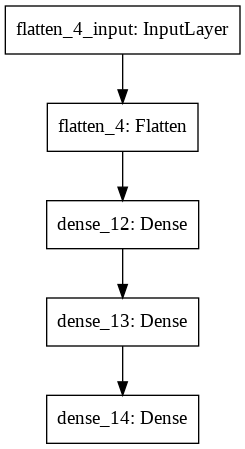

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file="Cifar10_model.png")

flatten_4_input (1, 32, 32, 3) 


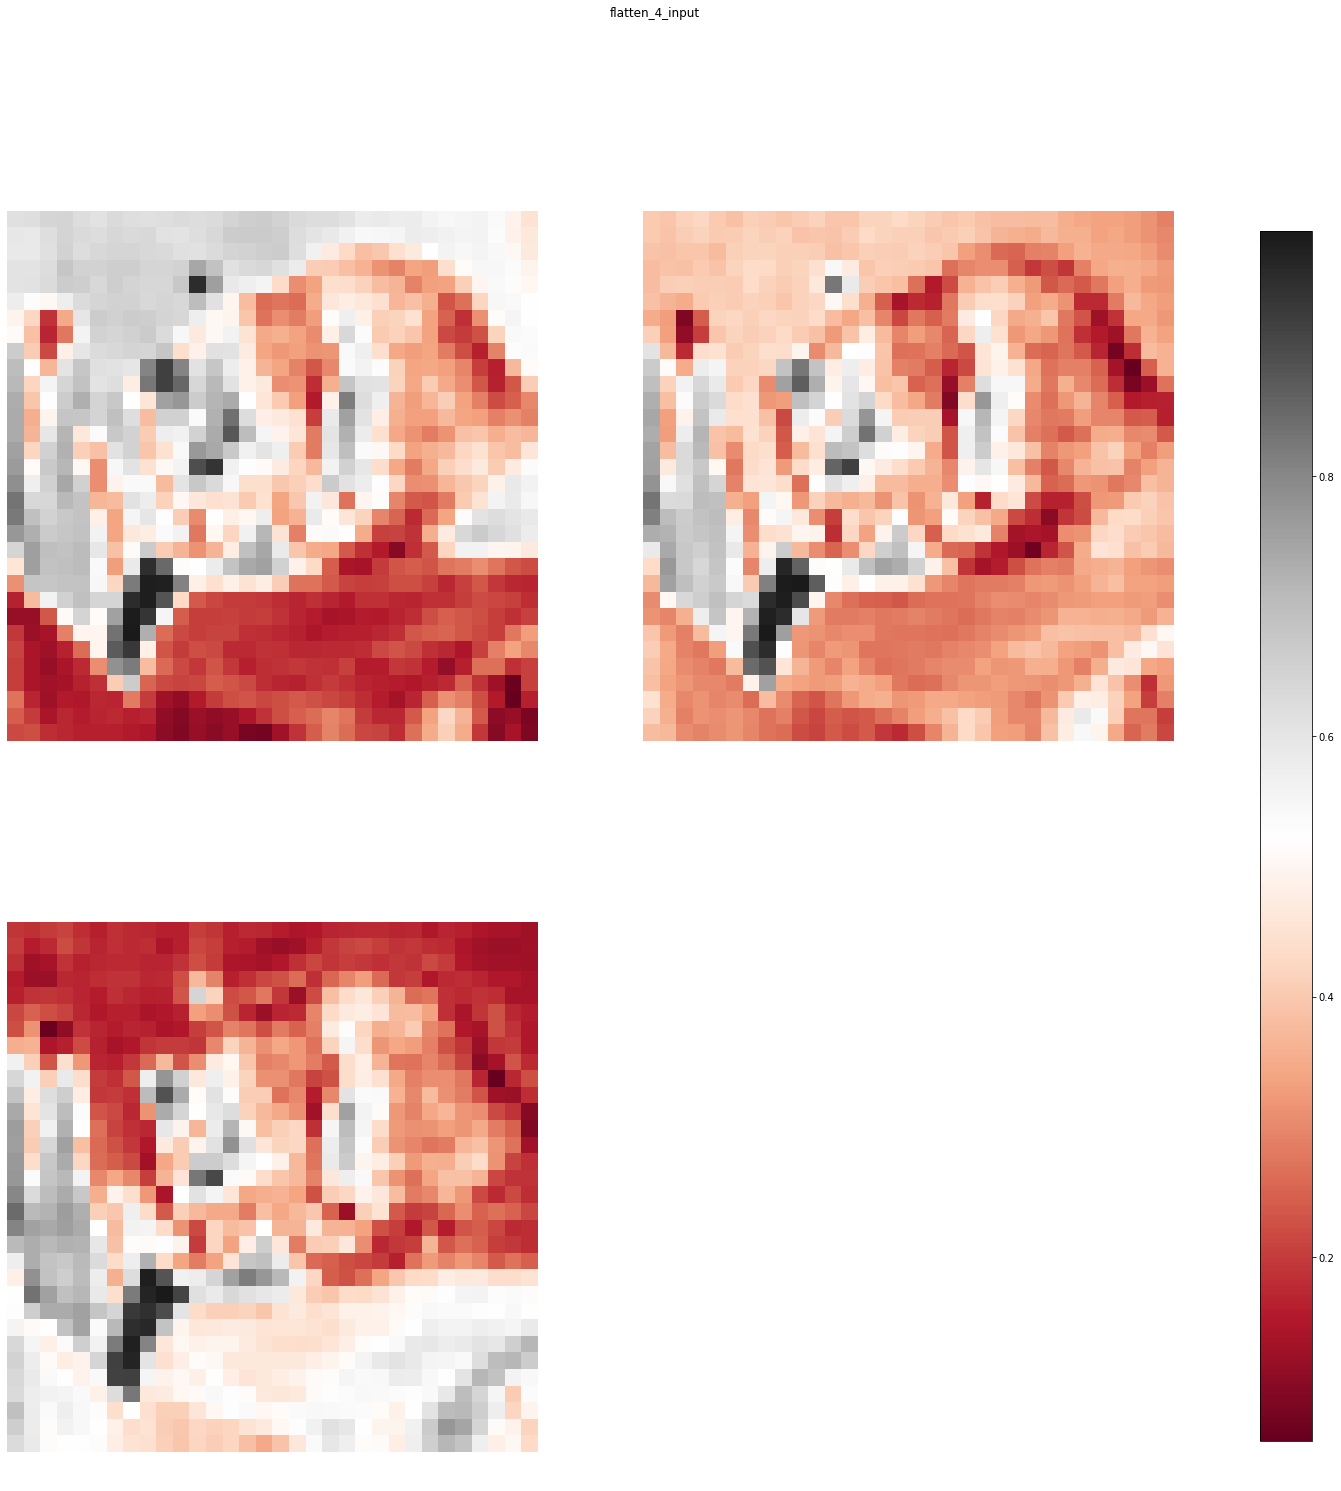

flatten_4 (1, 3072) 


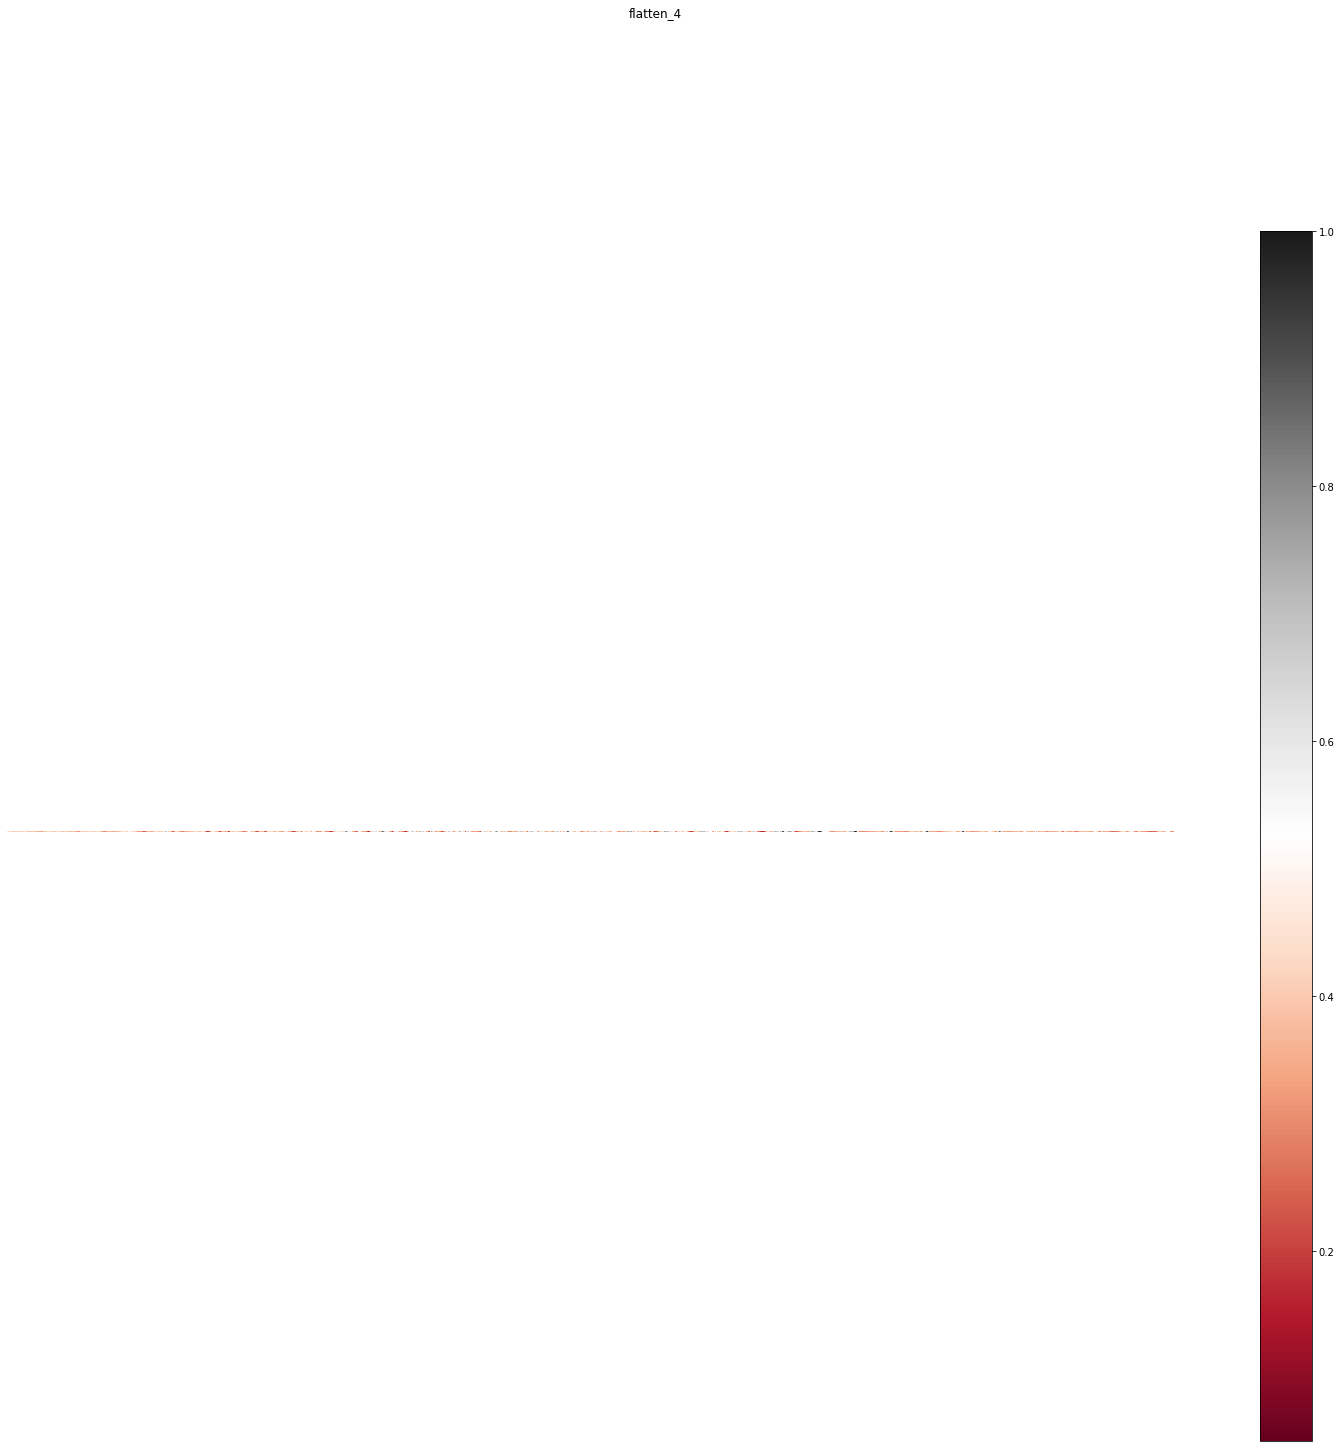

dense_12 (1, 512) 


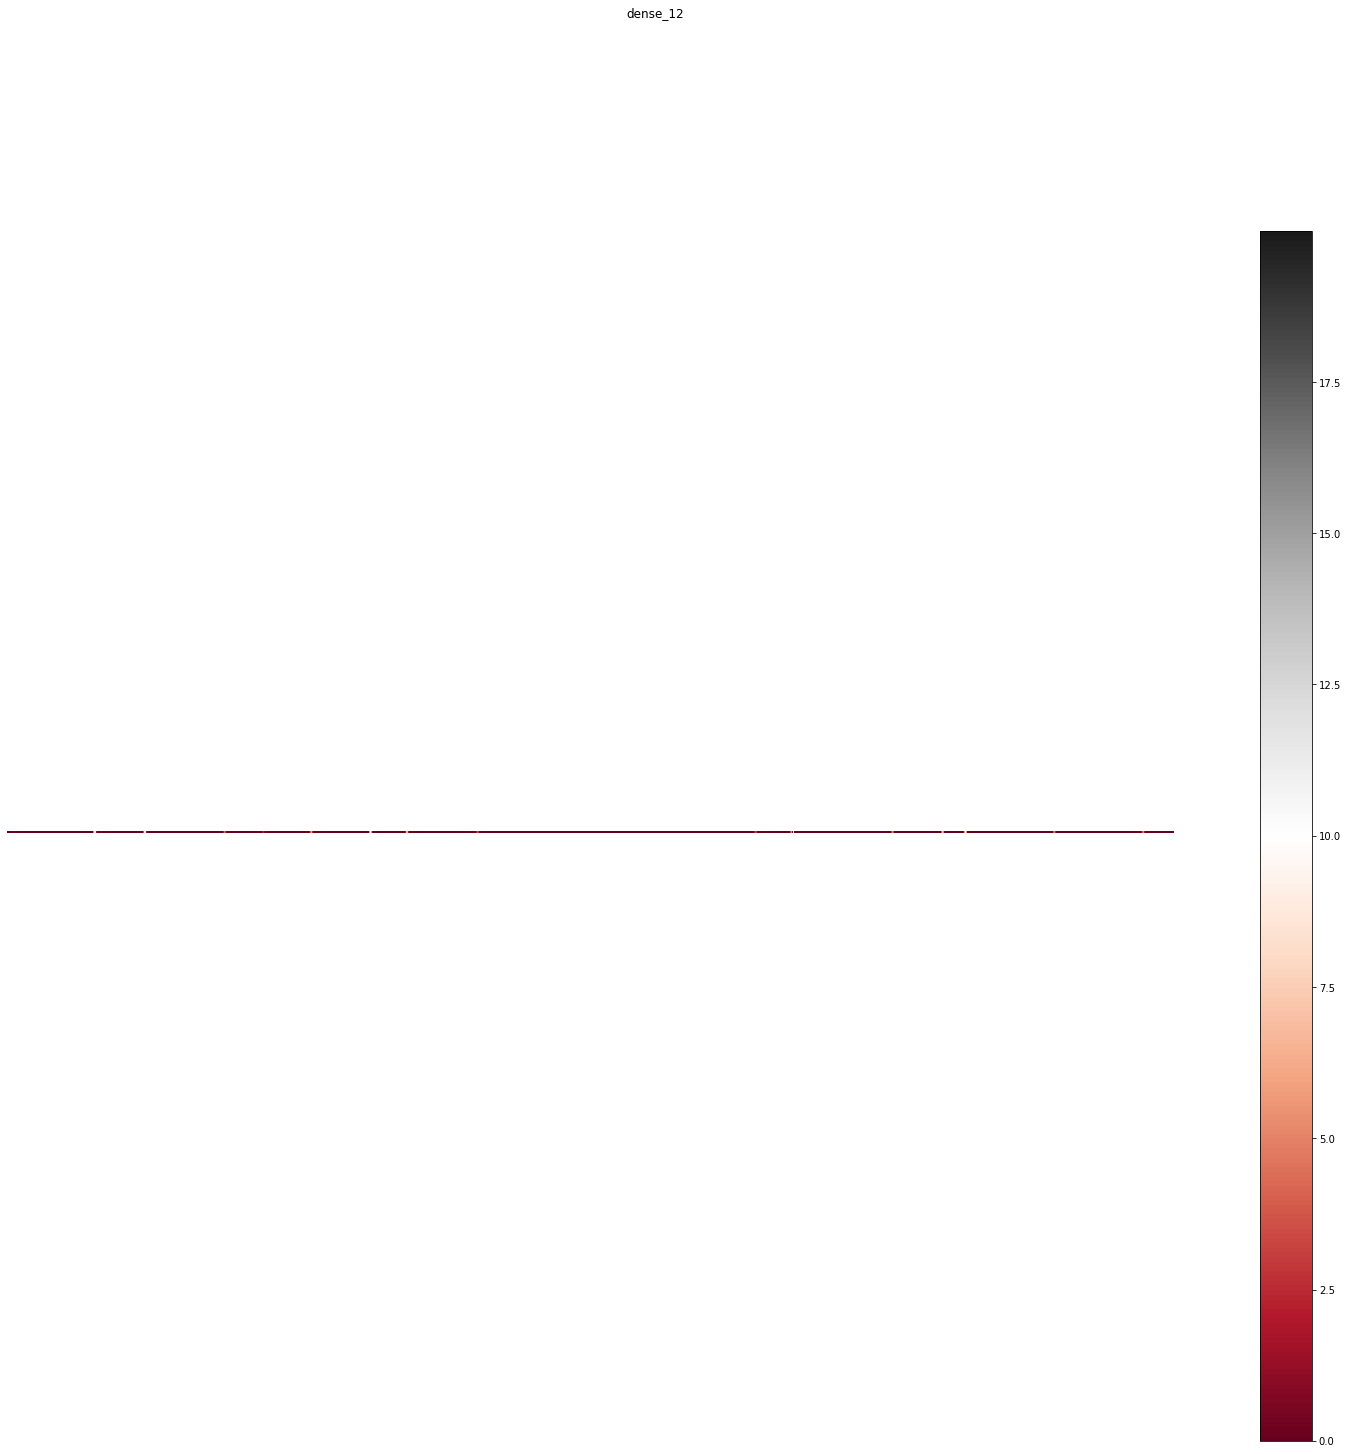

dense_13 (1, 128) 


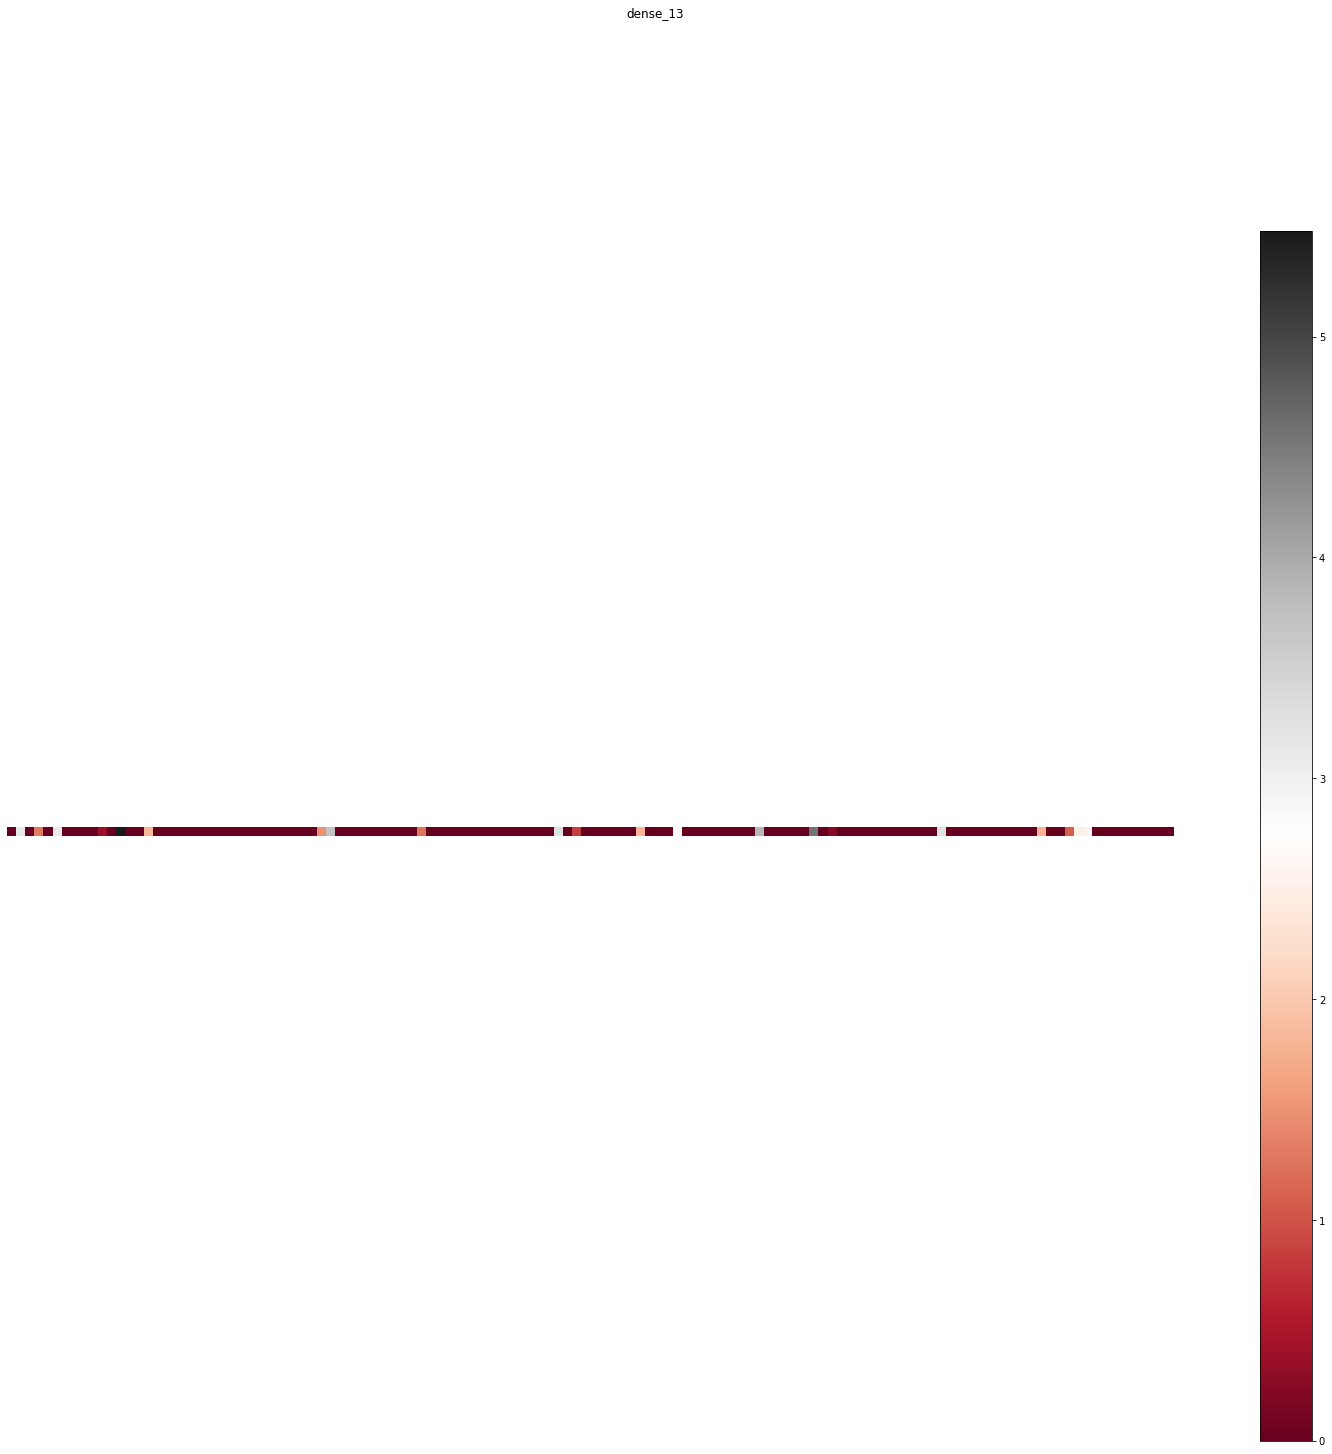

dense_14 (1, 10) 


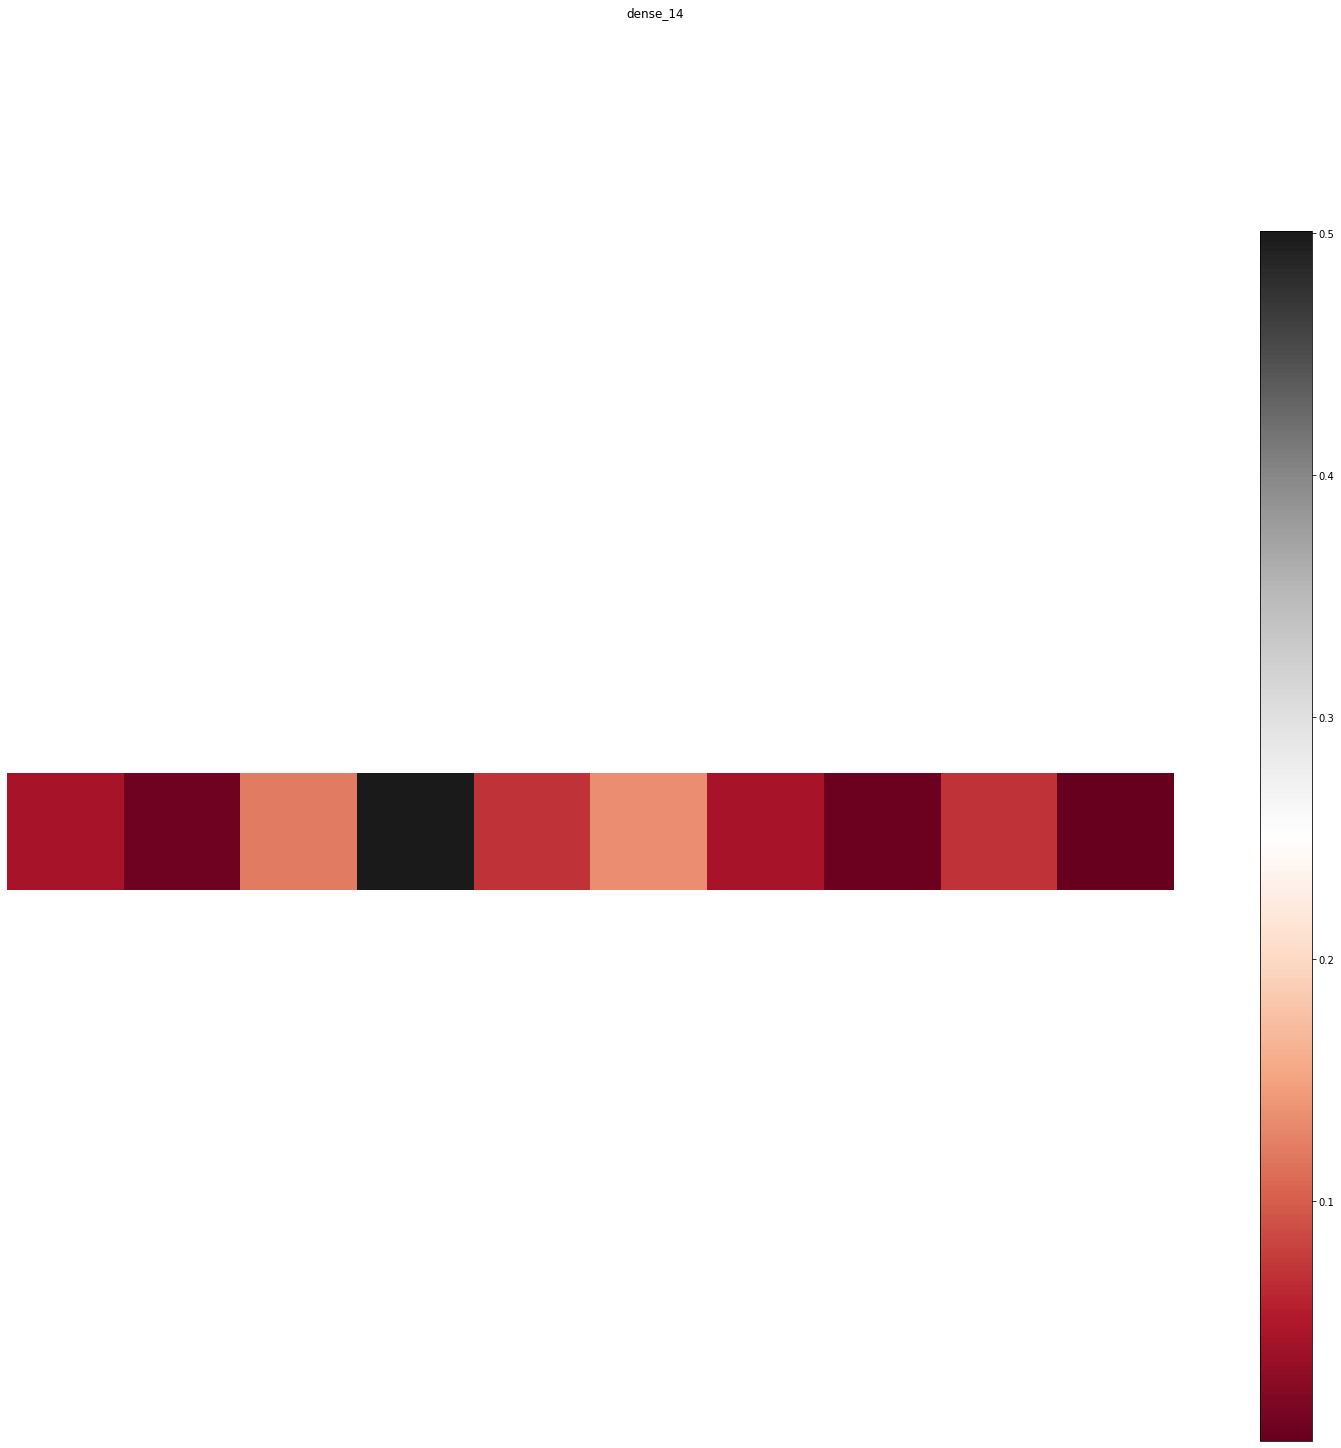

In [ ]:
from keract import get_activations, display_activations
keract_inputs = X_test[:1]
keract_targets = Y_test[:1]
activations = get_activations(model, keract_inputs)
display_activations(activations, cmap="RdGy", save=False)

In [ ]:
#Importing the libraries to download Cifar 10
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import tarfile

#Creating Cifar-10-batchers-py folder
cifar10_dataset_folder_path = 'cifar-10-batches-py'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num
#Download Cifar10 Dataset in tar.gz extension
if not isfile('cifar-10-python.tar.gz'):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            'cifar-10-python.tar.gz',
            pbar.hook)
#Extracting the tar.gz extension
if not isdir(cifar10_dataset_folder_path):
    with tarfile.open('cifar-10-python.tar.gz') as tar:
        tar.extractall()
        tar.close()

In [ ]:
import pickle
import matplotlib.pyplot as plt
#Labels of the Cifar10
LABEL_NAMES = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def load_cfar10_batch(batch_id):
#Loading the batches of Cifar10 with batch labels
    with open(cifar10_dataset_folder_path + '/data_batch_' 
              + str(batch_id), mode='rb') as file:
        batch = pickle.load(file, encoding='latin1')

    features = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    labels = batch['labels']

    return features, labels


def display_stats(features, labels, sample_id):
#Dsiplaying sample images 

    if not (0 <= sample_id < len(features)):
        print('{} samples in batch {}.  {} is out of range.'
              .format(len(features), batch_id, sample_id))
        return None



    sample_image = features[sample_id]
    sample_label = labels[sample_id]

    plt.axis('off')
    plt.imshow(sample_image)
    plt.show()

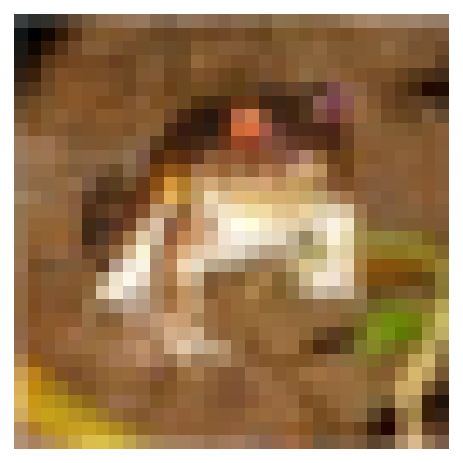

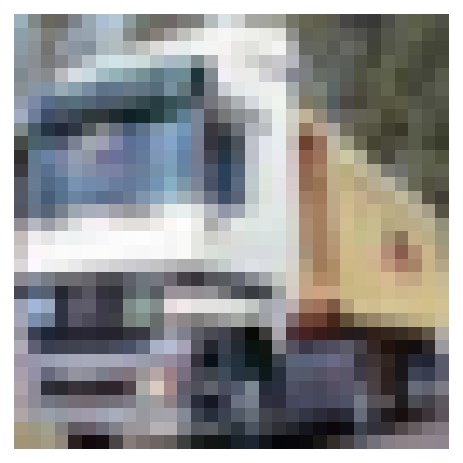

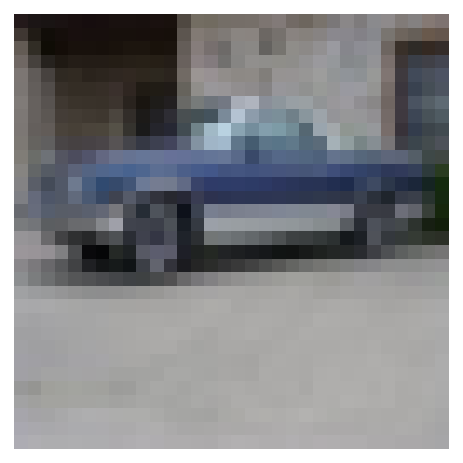

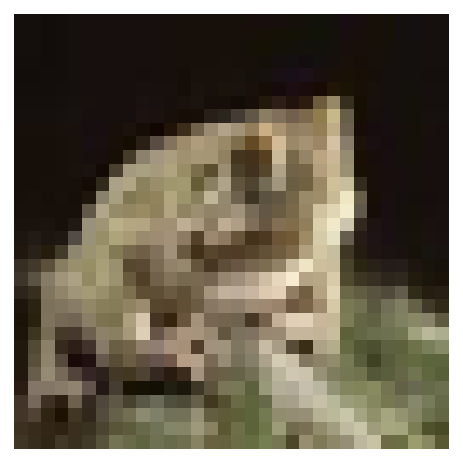

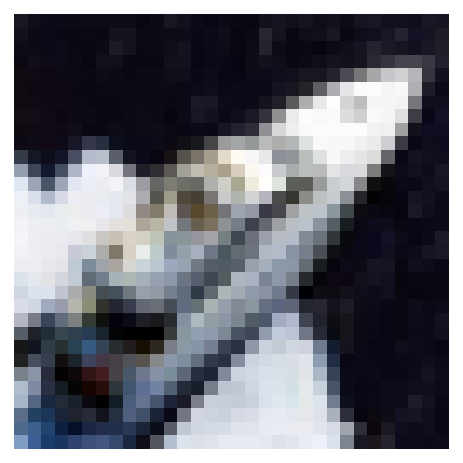

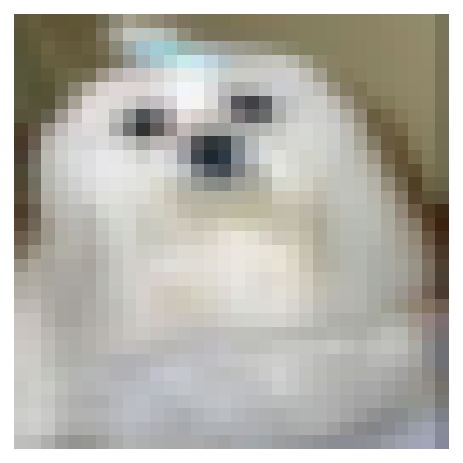

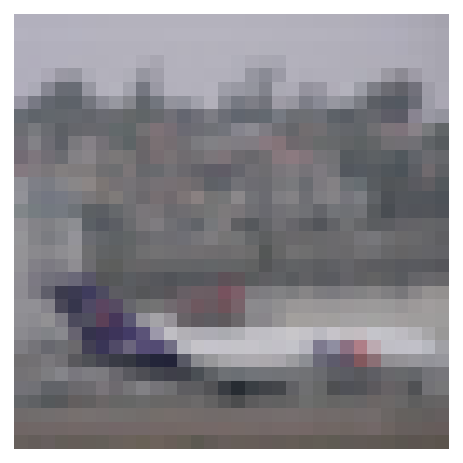

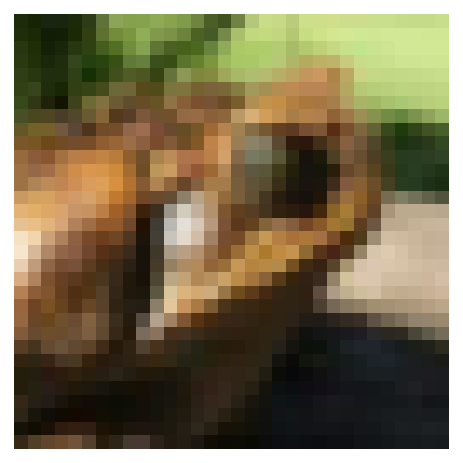

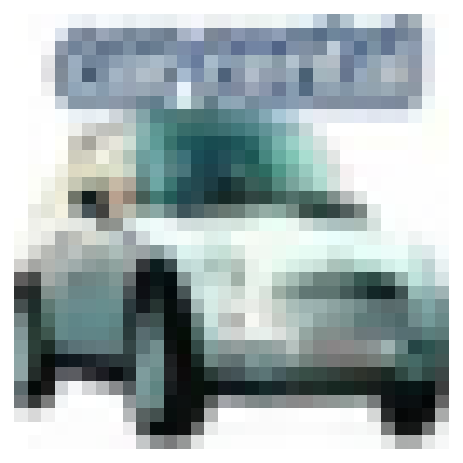

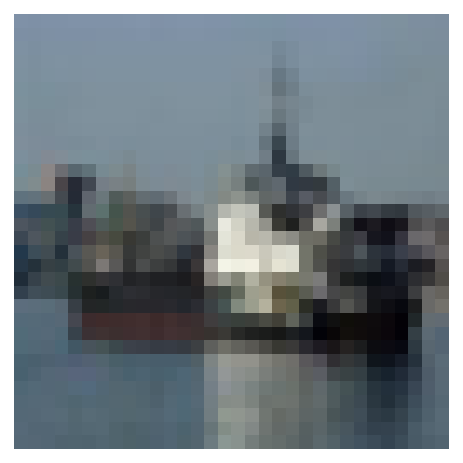

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
#Displaying the images of samles using function display_stats
import numpy as np

for batch_id in range(1,6):
    features, labels = load_cfar10_batch(batch_id)
    for image_id in range(0,2):
        display_stats(features, labels, image_id)

del features, labels     

In [ ]:
#Normalizing the data set
def normalize(x):
    return np.array(x) / 255.0

In [ ]:
#Hot encoding or categorizng the input images or dataset to respective classses
def one_hot_encode(x):
    one_hot_encoded = np.zeros((len(x), 10))
    for i in range(len(x)):
        one_hot_encoded[i][x[i]] = 1.0
    return one_hot_encoded

In [ ]:
#Pre processing the images and saving it with normalization and one hot enocding
def preprocess_and_save(features, labels, filename):

    features = normalize(features) 
    labels = one_hot_encode(labels)

    pickle.dump((features, labels), open(filename, 'wb'))

def preprocess_and_save_all_data():

    n_batches = 5
    valid_features = []
    valid_labels = []

    for batch_i in range(1, n_batches + 1):
        features, labels = load_cfar10_batch(batch_i)
        validation_count = int(len(features) * 0.1)

      
        preprocess_and_save(
            features[:-validation_count],
            labels[:-validation_count],
            'preprocess_batch_' + str(batch_i) + '.p')

        valid_features.extend(features[-validation_count:])
        valid_labels.extend(labels[-validation_count:])

    
    preprocess_and_save(
        np.array(valid_features),
        np.array(valid_labels),
        'preprocess_validation.p')

    with open(cifar10_dataset_folder_path + '/test_batch', mode='rb') as file:
        batch = pickle.load(file, encoding='latin1')


    test_features = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    test_labels = batch['labels']

    preprocess_and_save(
        np.array(test_features),
        np.array(test_labels),
        'preprocess_training.p')

preprocess_and_save_all_data()

In [ ]:
import tensorflow as tf
#Making pre req of T-NN
def neural_net_image_input(image_shape):
    return tf.placeholder(tf.float32, shape=(None, image_shape[0], image_shape[1], image_shape[2]), name='x')

def neural_net_label_input(n_classes):
    return tf.placeholder(tf.float32, shape=(None, n_classes), name='y')

def neural_net_keep_prob_input():
    return tf.placeholder(tf.float32, name='keep_prob')

In [ ]:
#Making convolutional filters, layers and pooling layers so to extract features well
def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
   
   
    filter_height, filter_width, in_channels, out_channels = \
        conv_ksize[0], conv_ksize[1],  x_tensor.get_shape().as_list()[3], conv_num_outputs
    conv_filter = [filter_height, filter_width, in_channels, out_channels]
    

    weights = tf.Variable(tf.truncated_normal(conv_filter, stddev=0.05))
    bias = tf.Variable(tf.truncated_normal([conv_num_outputs], stddev=0.05))
    

    strides=(1,conv_strides[0], conv_strides[1], 1)
    
 
    conv = tf.nn.conv2d(x_tensor, weights, strides, padding='SAME')
    conv = tf.nn.bias_add(conv, bias)
    

    ksize = (1, pool_ksize[0], pool_ksize[1], 1)
    

    strides=(1,pool_strides[0], pool_strides[1], 1)
    
    pool = tf.nn.max_pool(conv, ksize, strides, padding='SAME')
   
    return pool

In [ ]:
#Making the flatten layer to convert N-dimension arrays to 1D array 
def flatten(x_tensor):
    _, height, width, channels = x_tensor.get_shape().as_list()
    net = tf.reshape(x_tensor, shape=[-1, height * width * channels])
    print('flatten shape', net.get_shape().as_list())
    return net
#Making the fully connected layer
def fully_conn(x_tensor, num_outputs):
    _, size = x_tensor.get_shape().as_list()
    weights = tf.Variable(tf.truncated_normal([size, num_outputs], stddev=0.05))
    bias = tf.Variable(tf.truncated_normal([num_outputs], stddev=0.05))
    
    fully_connected = tf.add(tf.matmul(x_tensor, weights), bias)
    
    print('layer input shape', x_tensor.get_shape().as_list(),
         'layer output shape', fully_connected.get_shape().as_list())
    
    return fully_connected

In [ ]:
#Making the model 
def conv_net(input_x, keep_probability):
    
    net = conv2d_maxpool(input_x,   32, (7,7), (2,2), (2,2), (2,2))
    net = conv2d_maxpool(net, 64, (3,3), (1,1), (2,2), (2,2))
    net = conv2d_maxpool(net, 128, (2,2), (1,1), (2,2), (2,2))
    
    net = flatten(net)
    net = tf.nn.dropout(net, keep_probability)
    net = fully_conn(net, 1024)
    net = tf.nn.dropout(net, keep_probability)
    net = fully_conn(net, 128)
    net = fully_conn(net, 10)

    return net

In [ ]:
#Disabling the Tensorflow 2.0 behaviour
import tensorflow.compat.v1 as tf

tf.disable_v2_behavior() 

In [ ]:
from tensorflow.python.framework import ops
ops.reset_default_graph()

IMAGE_SHAPE = (32, 32, 3)
LABELS_COUNT = 10

#Summary of the model
x = neural_net_image_input(IMAGE_SHAPE)
y = neural_net_label_input(LABELS_COUNT)
keep_prob = neural_net_keep_prob_input()


logits = conv_net(x, keep_prob)


logits = tf.identity(logits, name='logits')


cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

flatten shape [None, 512]
layer input shape [None, 512] layer output shape [None, 1024]
layer input shape [None, 1024] layer output shape [None, 128]
layer input shape [None, 128] layer output shape [None, 10]


In [ ]:
valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))
#Calculating the stats like accuracy and loss function
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    batch_loss = session.run(cost, feed_dict=\
                    {x:feature_batch, y:label_batch, keep_prob:1.0})
    batch_accuracy = session.run(accuracy, feed_dict=\
                    {x:valid_features, y:valid_labels, keep_prob:1.0})
    
    print('batch loss is : ', batch_loss)
    print('batch_accuracy accuracy is :',batch_accuracy)

In [ ]:
epochs = 30
batch_size = 256
keep_probability = 0.5

In [ ]:
#Labeling each batch 
def batch_features_labels(features, labels, batch_size):

    for start in range(0, len(features), batch_size):
        end = min(start + batch_size, len(features))
        yield features[start:end], labels[start:end]
#Loading the perviosuly saved perprossed batch for training
def load_preprocess_training_batch(batch_id, batch_size):

    filename = 'preprocess_batch_' + str(batch_id) + '.p'
    features, labels = pickle.load(open(filename, mode='rb'))

 
    return batch_features_labels(features, labels, batch_size)

In [ ]:
#Running the model for training puprose
with tf.Session() as session:
   
    session.run(tf.global_variables_initializer())
    

    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in \
            load_preprocess_training_batch(batch_i, batch_size):
            session.run(optimizer, feed_dict=\
                        {x:batch_features, y:batch_labels, keep_prob:keep_probability})
        print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
        print_stats(session, batch_features, batch_labels, cost, accuracy)

Epoch  1, CIFAR-10 Batch 1:  batch loss is :  2.0190556
batch_accuracy accuracy is : 0.329
Epoch  2, CIFAR-10 Batch 1:  batch loss is :  1.7711084
batch_accuracy accuracy is : 0.3858
Epoch  3, CIFAR-10 Batch 1:  batch loss is :  1.557771
batch_accuracy accuracy is : 0.4238
Epoch  4, CIFAR-10 Batch 1:  batch loss is :  1.3727033
batch_accuracy accuracy is : 0.4706
Epoch  5, CIFAR-10 Batch 1:  batch loss is :  1.2033689
batch_accuracy accuracy is : 0.4812
Epoch  6, CIFAR-10 Batch 1:  batch loss is :  1.0485789
batch_accuracy accuracy is : 0.4918
Epoch  7, CIFAR-10 Batch 1:  batch loss is :  0.88492966
batch_accuracy accuracy is : 0.5
Epoch  8, CIFAR-10 Batch 1:  batch loss is :  0.69557774
batch_accuracy accuracy is : 0.5164
Epoch  9, CIFAR-10 Batch 1:  batch loss is :  0.61559045
batch_accuracy accuracy is : 0.5196
Epoch 10, CIFAR-10 Batch 1:  batch loss is :  0.54928577
batch_accuracy accuracy is : 0.5264
Epoch 11, CIFAR-10 Batch 1:  batch loss is :  0.43623075
batch_accuracy accuracy 

In [ ]:
#Saving the model
save_model_path = './Cifar10-Train'

with tf.Session() as session:

    session.run(tf.global_variables_initializer())
    
    for epoch in range(epochs):
   
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in \
                load_preprocess_training_batch(batch_i, batch_size):
                session.run(optimizer, feed_dict=\
                    {x:batch_features, y:batch_labels, keep_prob:keep_probability})

    saver = tf.train.Saver()
    save_path = saver.save(session, save_model_path)

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

INFO:tensorflow:Restoring parameters from ./Cifar10-Train
Testing Accuracy: 0.679296875



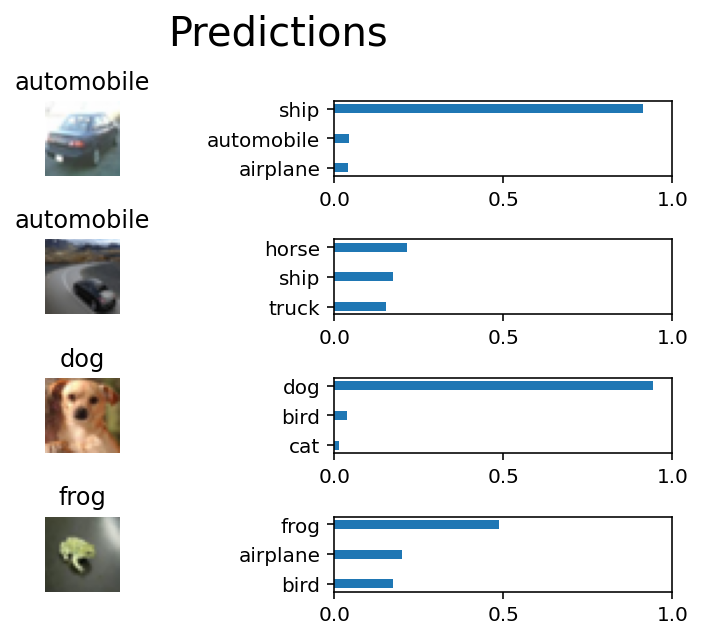

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
#Now we will predict the images to check the model if its good or not
import pickle
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
#Making the predictions 
def display_image_predictions(features, labels, predictions):
    label_binarizer = LabelBinarizer()
    label_binarizer.fit(range(LABELS_COUNT))
    label_ids = label_binarizer.inverse_transform(np.array(labels))

    fig, axies = plt.subplots(nrows=4, ncols=2)
    fig.tight_layout()
    fig.suptitle('Predictions', fontsize=20, y=1.1)

    n_predictions = 3
    margin = 0.05
    ind = np.arange(n_predictions)
    width = (1. - 2. * margin) / n_predictions

    for image_i, (feature, label_id, pred_indicies, pred_values) \
        in enumerate(zip(features, label_ids, predictions.indices, predictions.values)):
        pred_names = [LABEL_NAMES[pred_i] for pred_i in pred_indicies]
        correct_name = LABEL_NAMES[label_id]

        axies[image_i][0].imshow(feature)
        axies[image_i][0].set_title(correct_name)
        axies[image_i][0].set_axis_off()

        axies[image_i][1].barh(ind + margin, pred_values[::-1], width)
        axies[image_i][1].set_yticks(ind + margin)
        axies[image_i][1].set_yticklabels(pred_names[::-1])
        axies[image_i][1].set_xticks([0, 0.5, 1.0])

save_model_path = './Cifar10-Train'
n_samples = 4
top_n_predictions = 3

def test_model():


    test_features, test_labels = pickle.load(open('preprocess_training.p', mode='rb'))
    loaded_graph = tf.Graph()
#Running the model for test purpose
    with tf.Session(graph=loaded_graph) as sess:
    
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

      
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
    
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for train_feature_batch, train_label_batch in \
            batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: train_feature_batch, \
                           loaded_y: train_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))
        random_test_features, random_test_labels = \
            tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, \
                       loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        display_image_predictions(random_test_features, \
                                  random_test_labels, random_test_predictions)
test_model()